Import modules and data

In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib ipympl
%config InlineBackend.figure_format = 'retina'

from sklearn import preprocessing

Dataset info: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset
- Washington DC, docked bikes.
- Membership subscriptions.

Many values are already normalised 

There is also newer data [https://capitalbikeshare.com/system-data] Trip History Data. It does not have weather included but there is a link to weather data at the above link. Beware inclusion of dockless e-scooters after a certain point.

Method: Regression time series analysis.
Goals: Present KPIs/targets (eg how to increase ridership in winter)
Presentation: Company intro, data provided, data chosen to work with, analysis of that data (does not need to be the same data as for ML project)

Decide which timeframe and dataset to use

In [128]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

# First steps

check shape and column names

In [129]:
display(df_day.info())
#display(df_day.shape) #redundant
display(df_hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


None

check descriptive statistics

In [130]:
display(df_day.describe())
display(df_hour.describe())

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

check for missing values

In [131]:
display("Empty fields (day):",df_day.isnull().sum(), df_day.isna().sum())
display("Empty fields (hour):",df_hour.isnull().sum(), df_hour.isna().sum())

'Empty fields (day):'

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

'Empty fields (hour):'

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

check for duplicated values

In [132]:
display('Counts of duplicated items:', df_day.duplicated().value_counts())
display('Counts of duplicated items:', df_hour.duplicated().value_counts())

'Counts of duplicated items:'

False    731
dtype: int64

'Counts of duplicated items:'

False    17379
dtype: int64

check and change data types

In [133]:
df_day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [134]:
# cast 'dteday' columns to pandas 'datetime' object dtype https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
#df_day.dtypes

check unique values (weathersit seems to have more values in hour than day data)

In [135]:
display(df_day.nunique(), df_hour.nunique())

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

TODO: cast categorical columns (later, if needed...)

In [136]:
# df_day['workingday', 'weathersit'] = pd.Categorical(df_day['workingday', 'weathersit'])

# Histplot/univariate plots

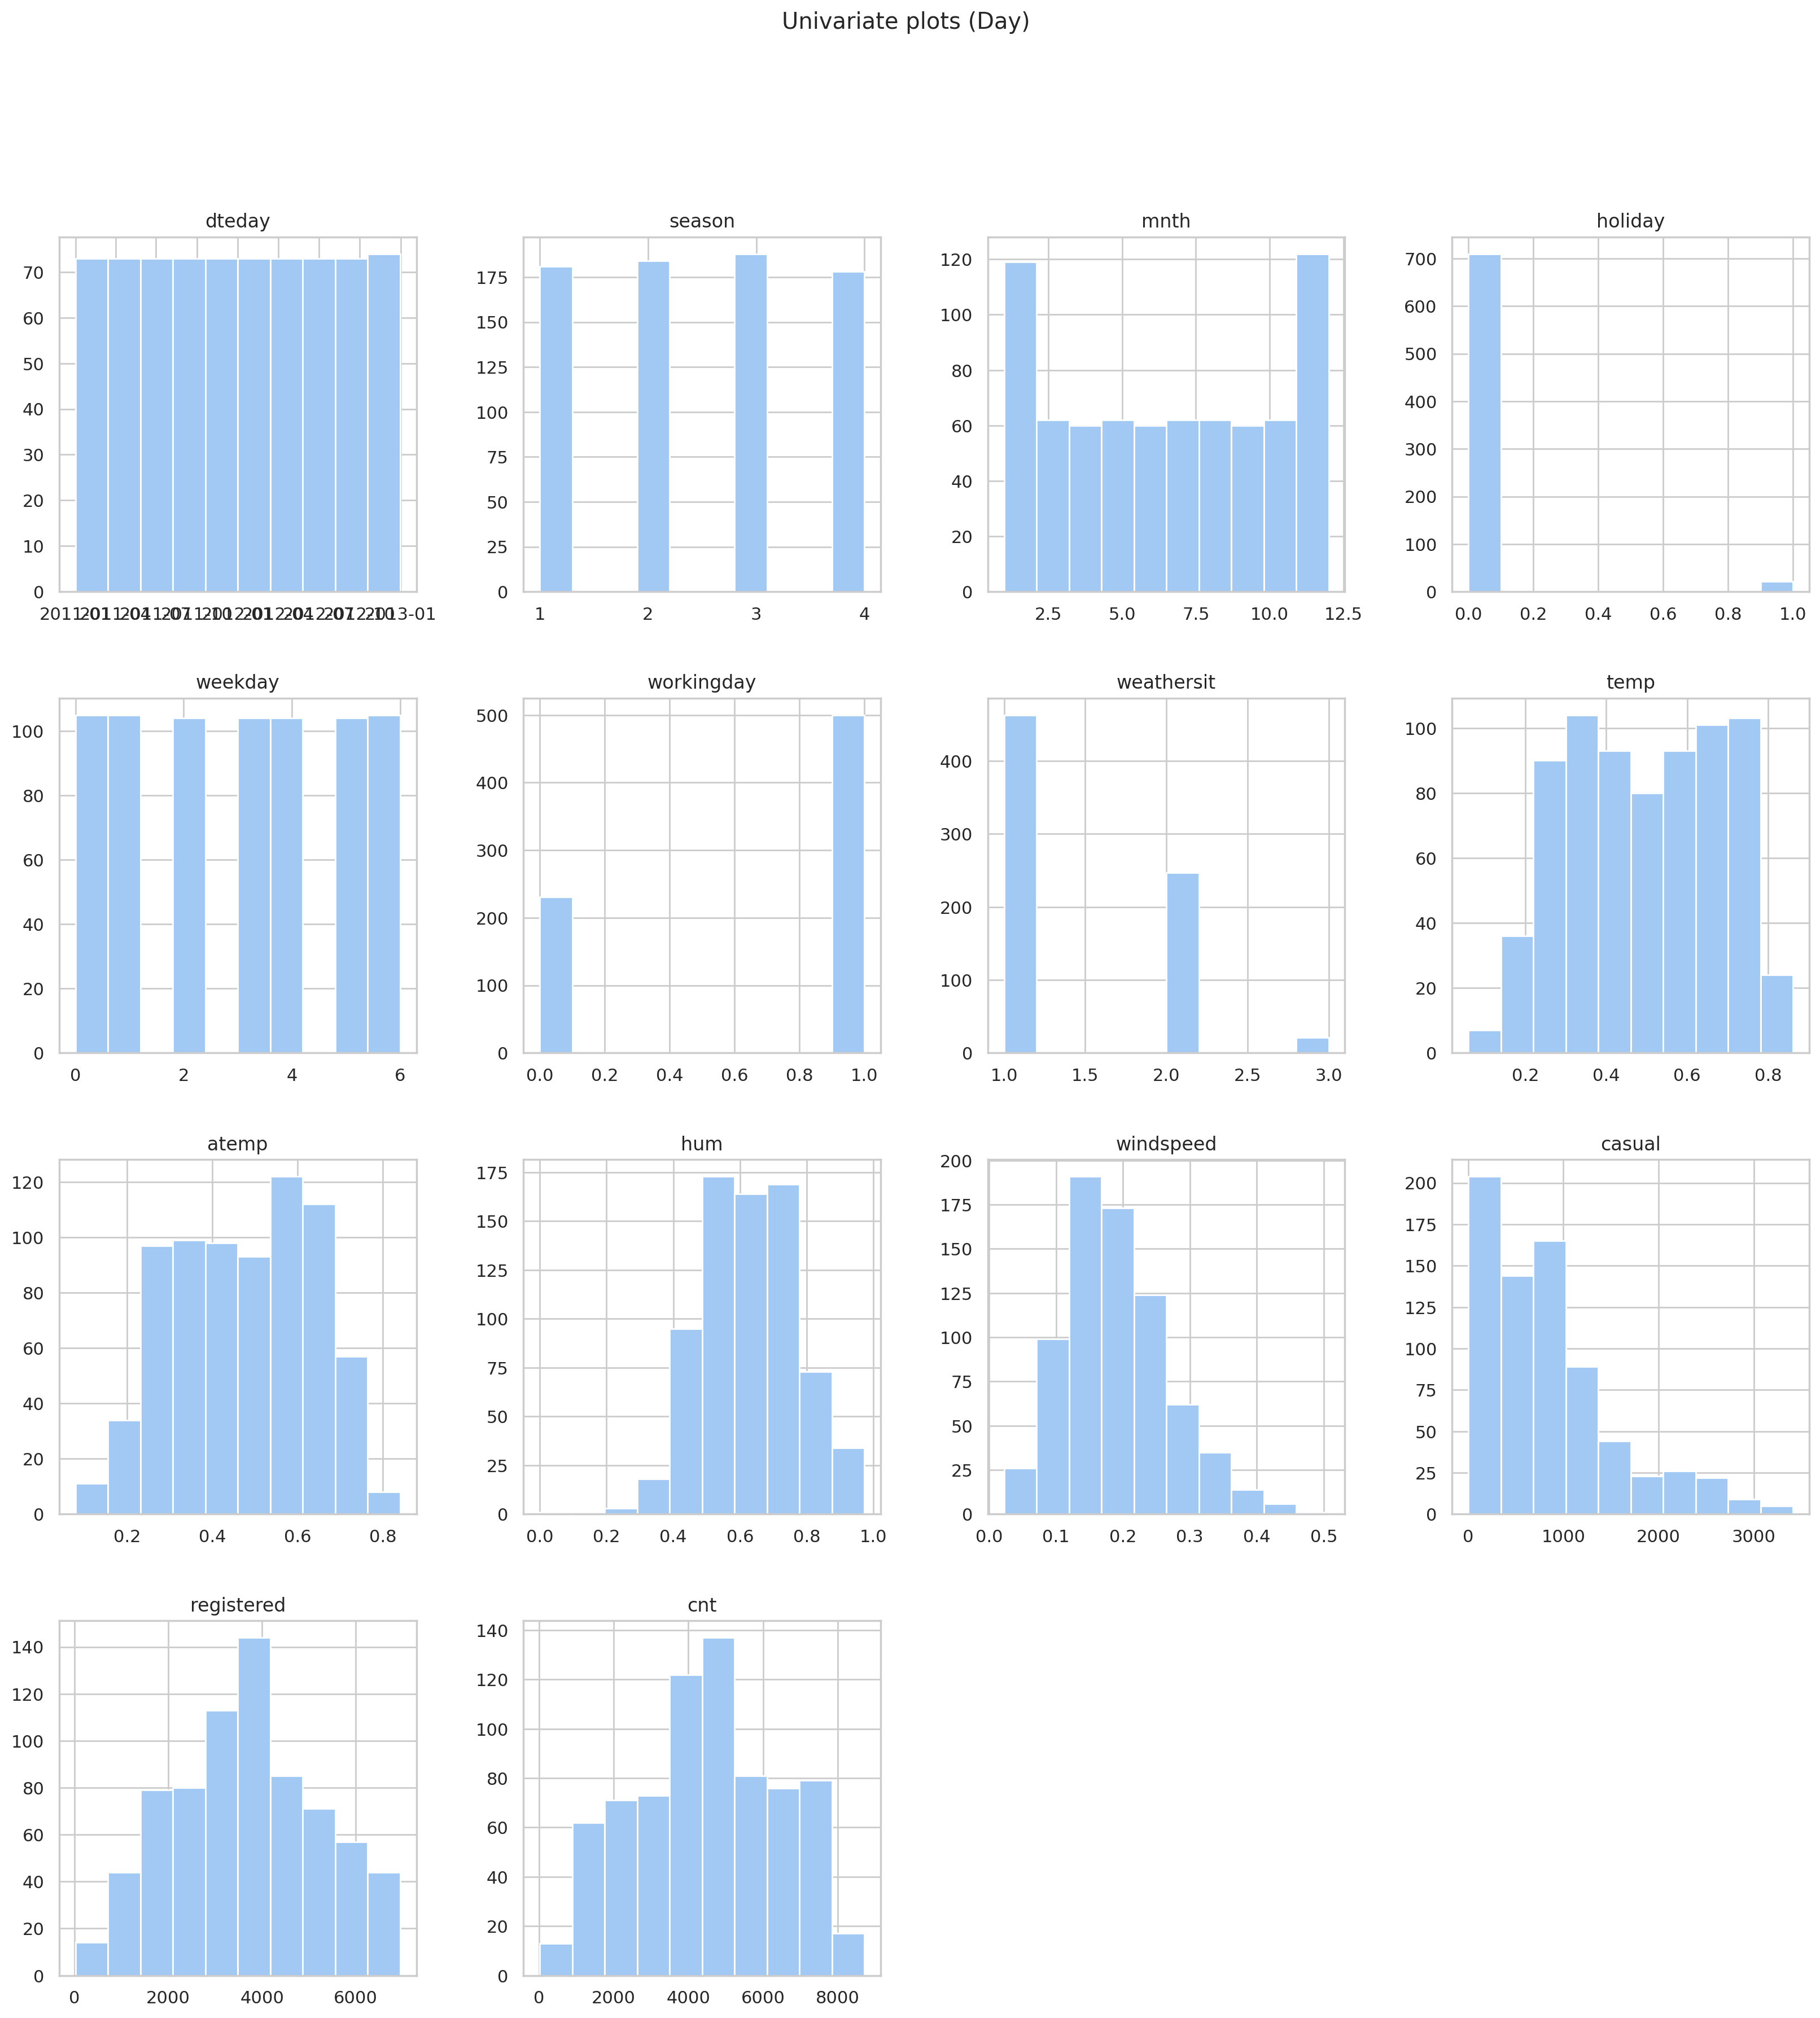

In [137]:
sns.set_theme(style="whitegrid", palette="pastel")

df_day.drop(['instant', 'yr'], axis=1).hist(figsize=(20, 20))
rt = plt.suptitle('Univariate plots (Day)')

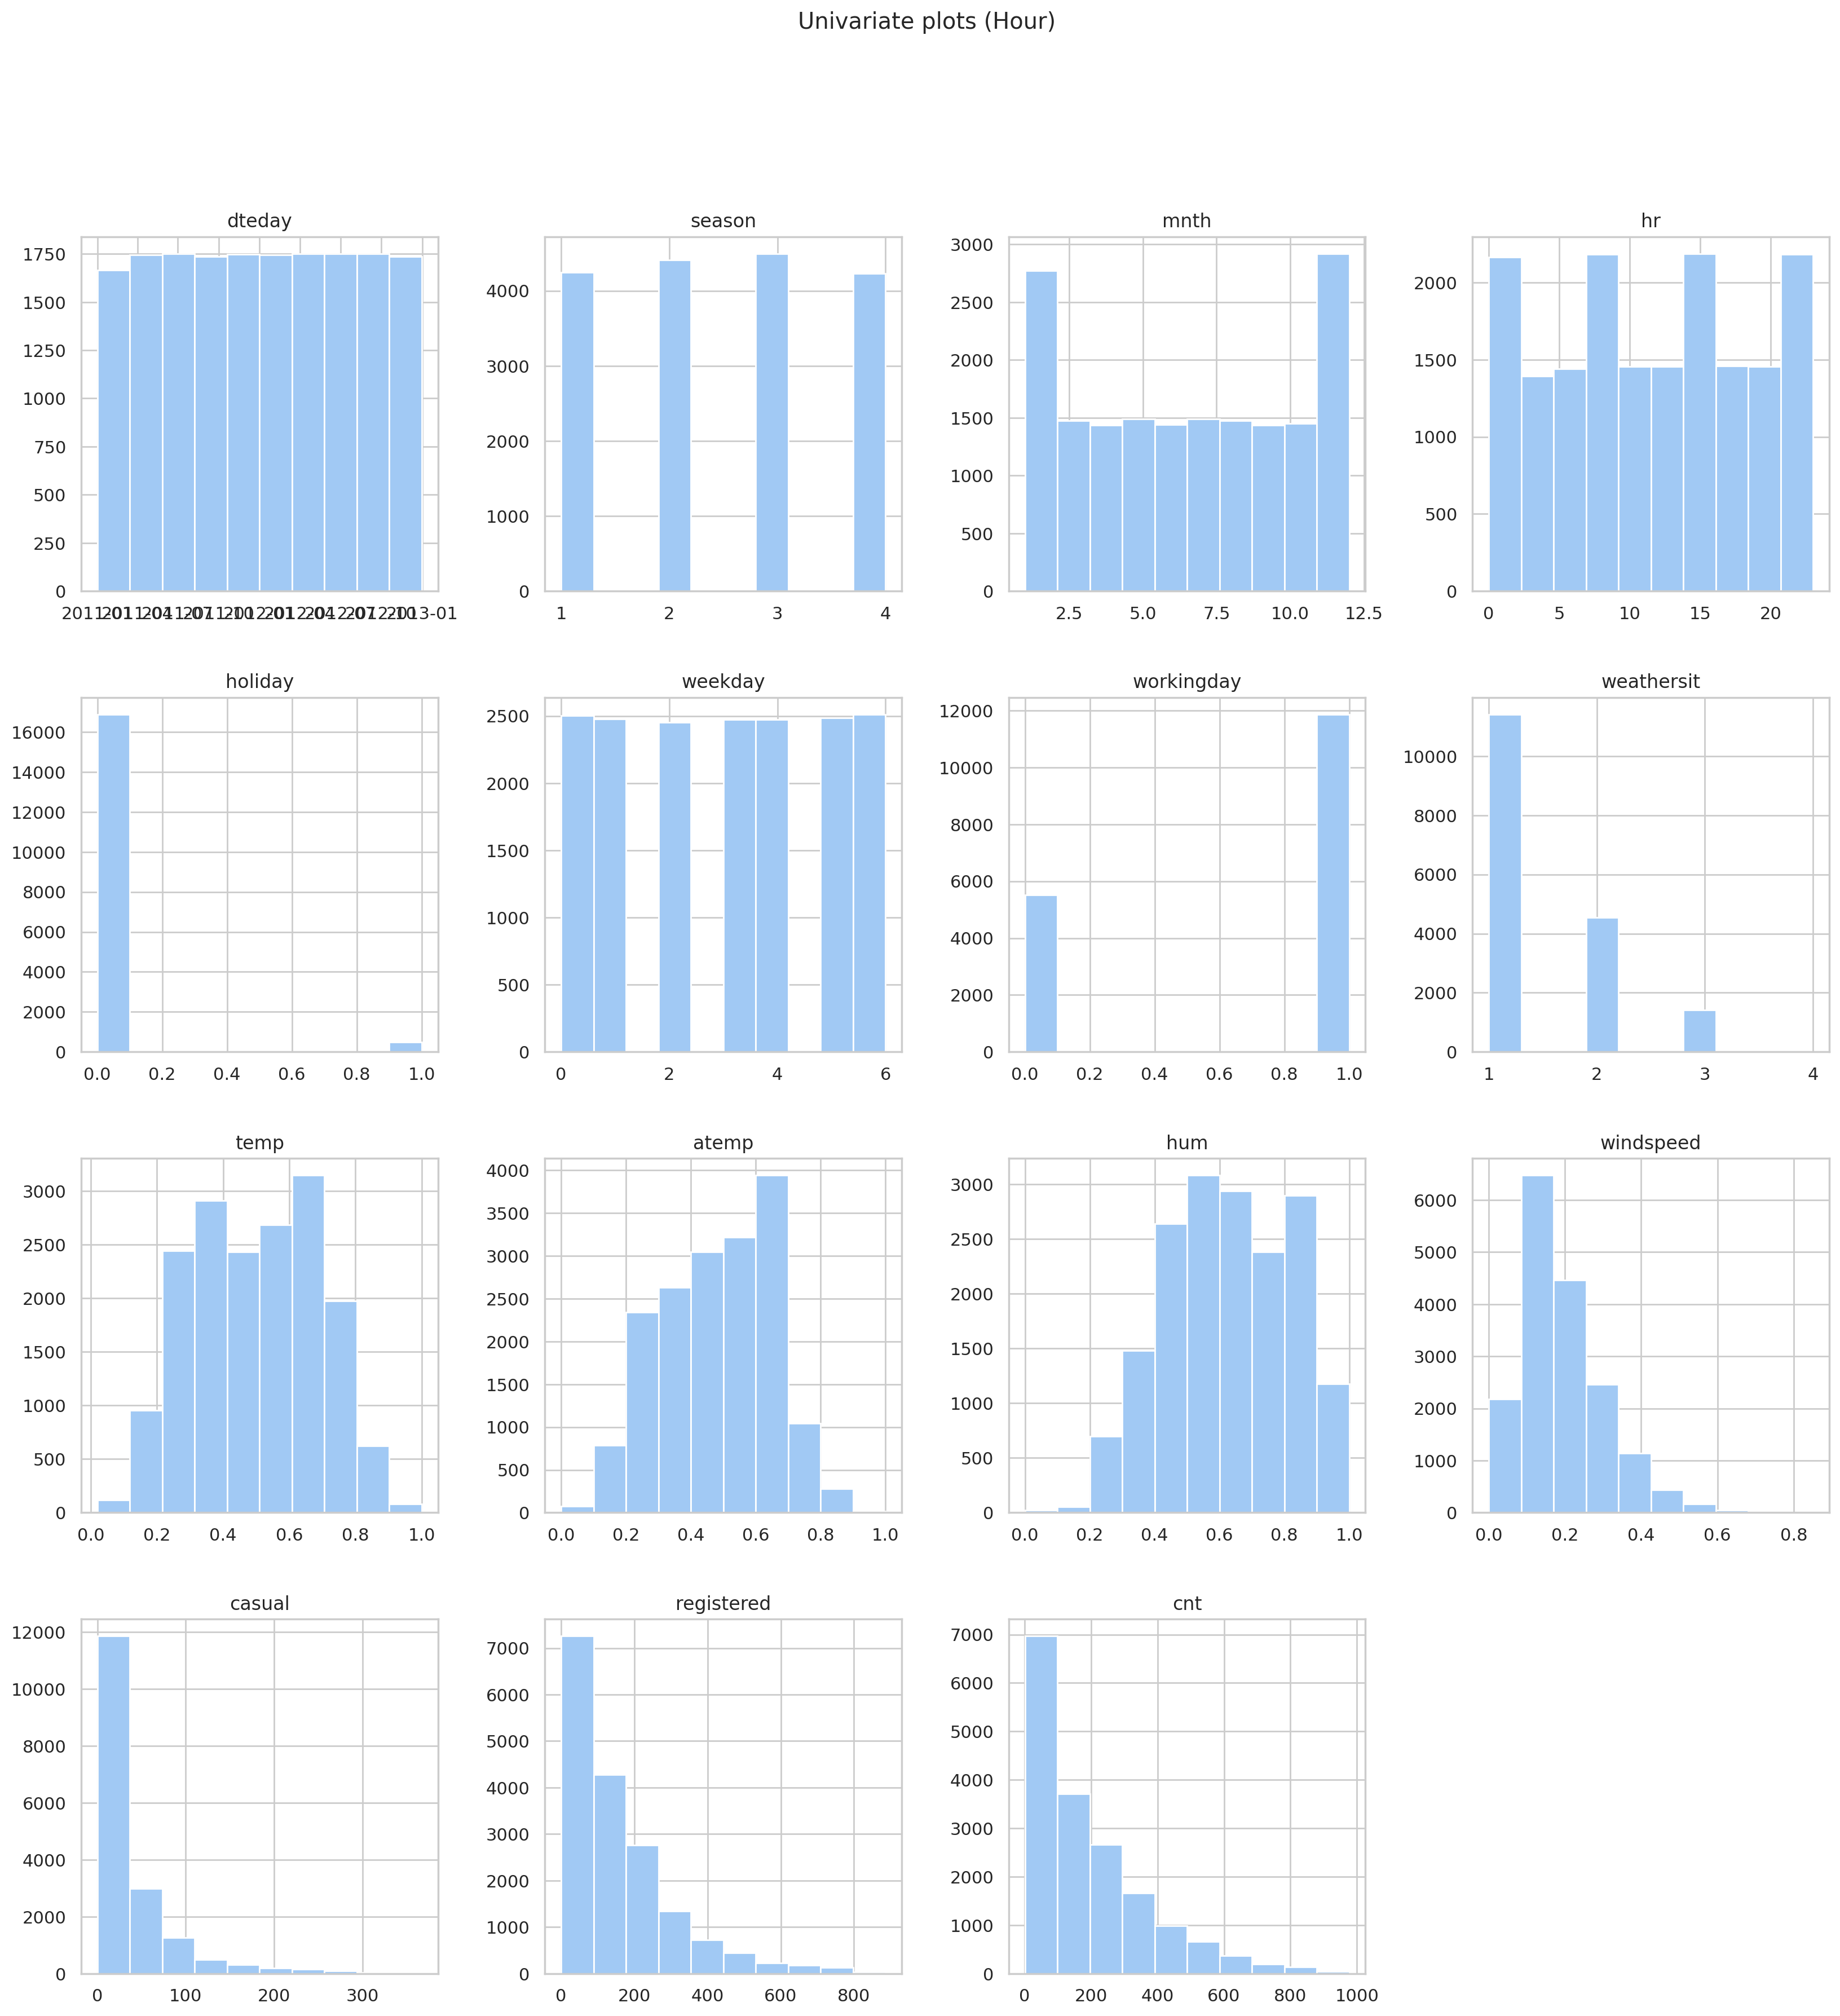

In [138]:
df_hour.drop(['instant', 'yr'], axis=1).hist(figsize=(20, 20))
rt = plt.suptitle('Univariate plots (Hour)')

In [139]:
#create a dict of human-readable keys for weather 
weatherdict = {1: 'Clear to partly cloudy', 2: 'Mist', 3: 'Light precipitation', 4:'Heavy precipitation'} ## can't make it read
#simple list
#weatherlist = ['Clear to partly cloudy', 'Mist', 'Light precipitation', 'Heavy precipitation']  ##not ordered correctly
#list of tuples
#weathertups = [(1, 'Clear to partly cloudy'),(2, 'Mist'), (3, 'Light precipitation'), (4,'Heavy precipitation')] ##not ordered correctly

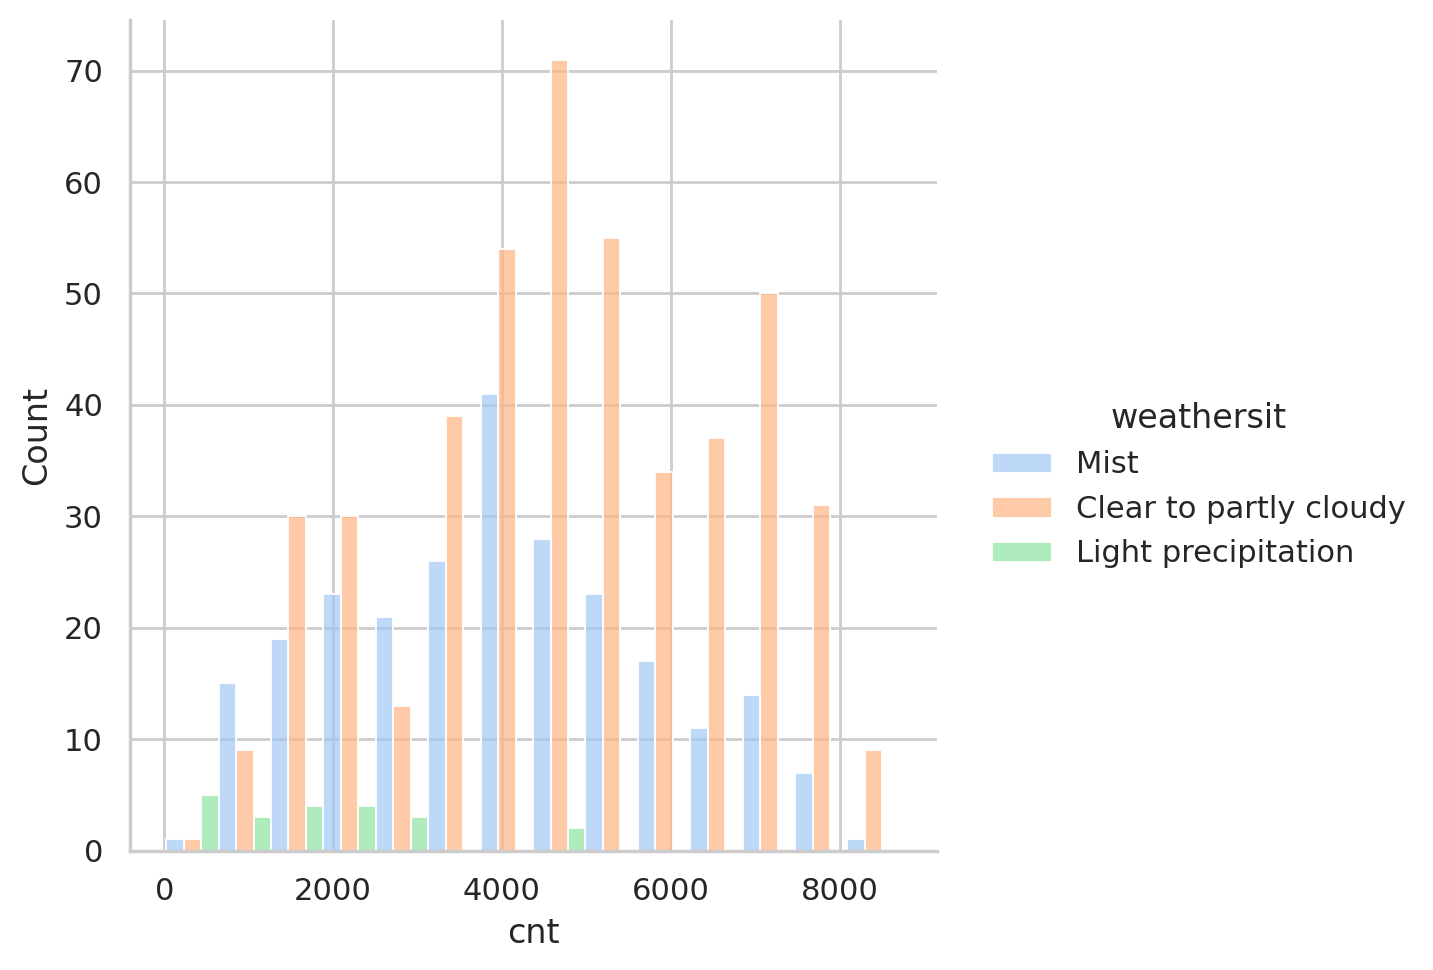

In [140]:
#distribution plot coded by weather?
plot_dist_weather_day = sns.displot(data=df_day, x='cnt', hue=df_day.weathersit.map(weatherdict), multiple='dodge', alpha=0.7)

#plt.legend(title='Weather', loc='upper left', labels=df_day.weathersit.map(weatherdict))
plt.show(plot_dist_weather_day)
#plot_dist_weather_day.add_legend()

#use get_legend_handles_labels?
# #plot_dist_weather_day.legend(labels=weatherdict[plot_dist_weather_day.get_legend_handles_labels()]) ##AttributeError: 'FacetGrid' object has no attribute 'get_legend_handles_labels'

In [141]:
print(df_day.weathersit.map(weatherdict))

0                        Mist
1                        Mist
2      Clear to partly cloudy
3      Clear to partly cloudy
4      Clear to partly cloudy
                ...          
726                      Mist
727                      Mist
728                      Mist
729    Clear to partly cloudy
730                      Mist
Name: weathersit, Length: 731, dtype: object


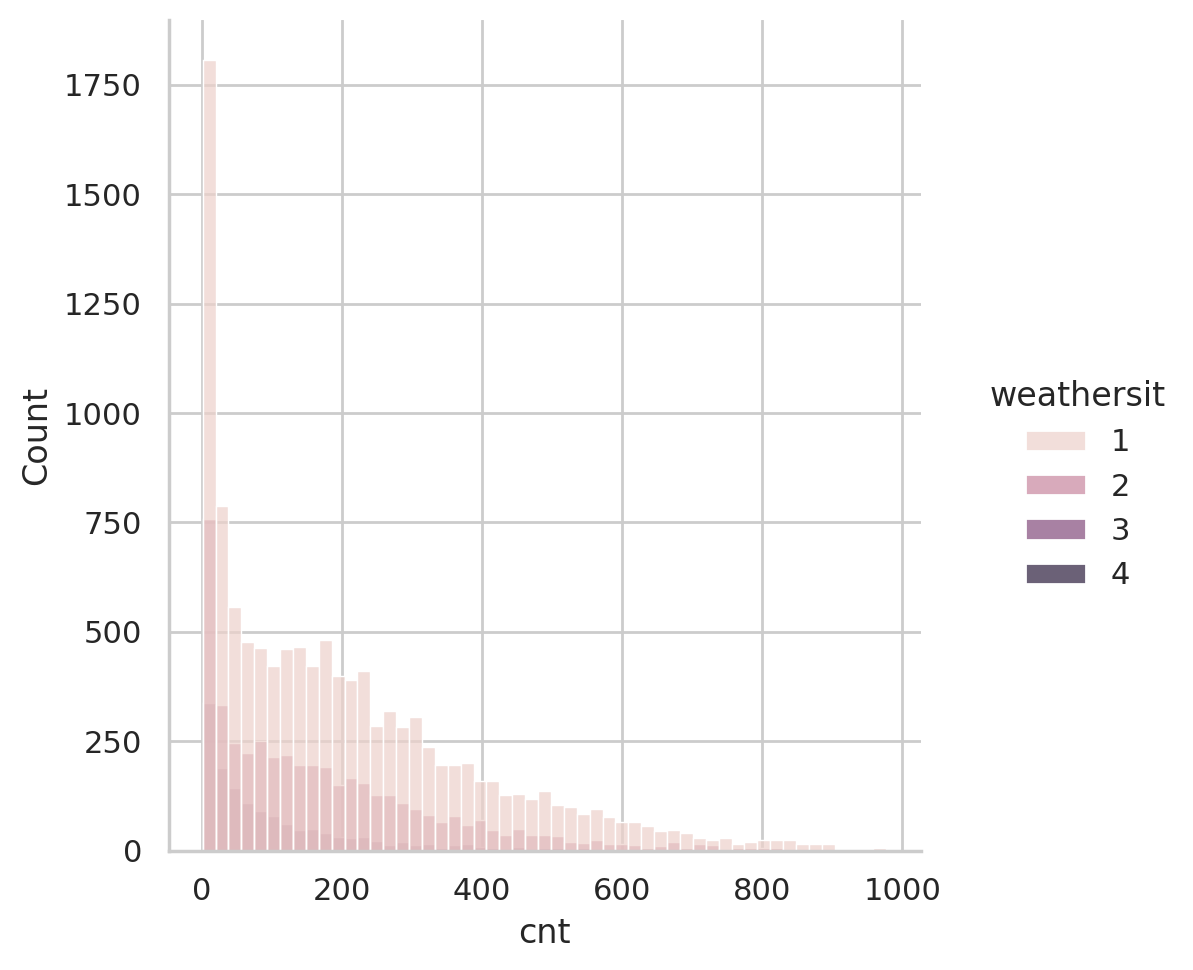

In [142]:
sns.displot(data=df_hour, x='cnt', hue='weathersit', alpha=0.7)

# Scatterplots: Do registered riders ride more in bad weather?

In [143]:
#first make a new column to view registered ridership as a proportion of rides
df_hour['registered_proportion'] = df_hour.registered / df_hour.cnt
#df_hour['registered_proportion'].describe()    #double check values are between 0 and 1, ie a portion of all rides are by registered users

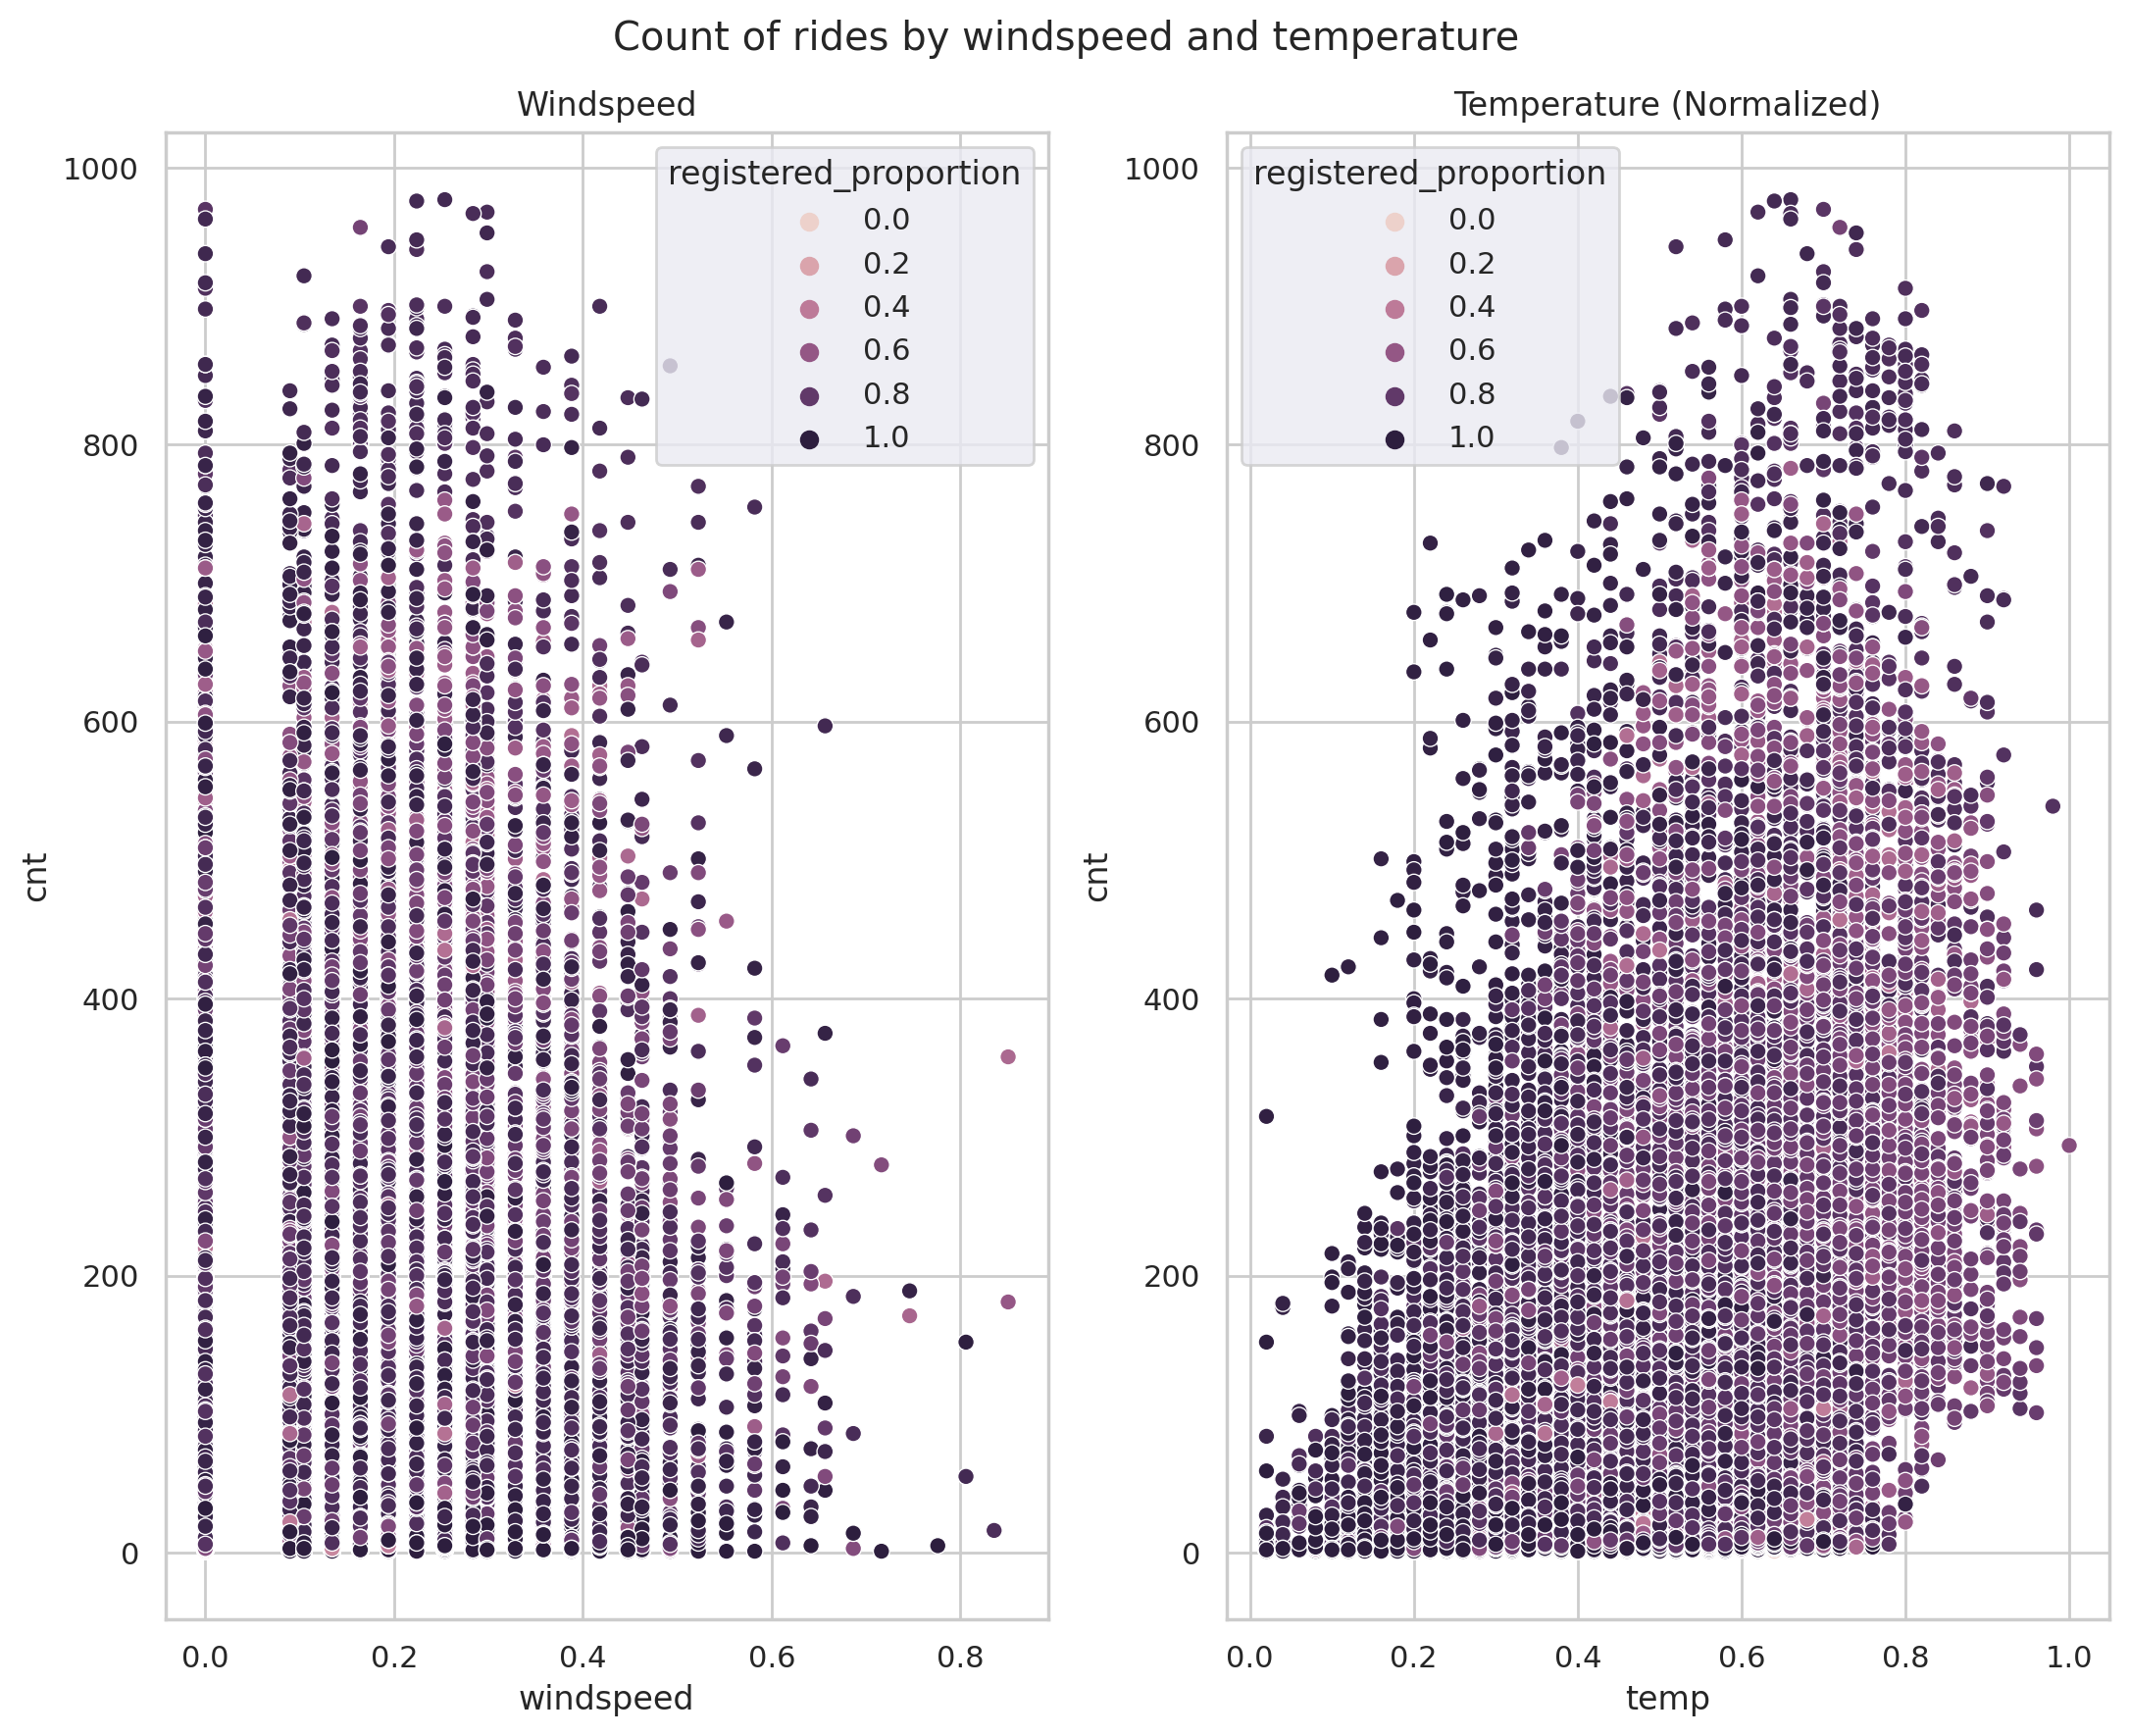

In [144]:
fig, axes=plt.subplots(1,2)

sns.set_style('darkgrid')
sns.scatterplot(ax=axes[0], data=df_hour, y=df_hour.cnt, x=df_hour.windspeed, hue='registered_proportion')
axes[0].set_title('Windspeed')

sns.scatterplot(ax=axes[1],data=df_hour, y=df_hour.cnt, x=df_hour.temp, hue='registered_proportion')
axes[1].set_title('Temperature (Normalized)')

fig.suptitle('Count of rides by windspeed and temperature')

plt.tight_layout()

# Boxplot

In [145]:
#TODO

# Multivariate analysis: heatmap

season        yr      mnth   holiday   weekday  workingday  \
season      1.000000 -0.001844  0.831440 -0.010537 -0.003080    0.012485   
yr         -0.001844  1.000000 -0.001792  0.007954 -0.005461   -0.002013   
mnth        0.831440 -0.001792  1.000000  0.019191  0.009509   -0.005901   
holiday    -0.010537  0.007954  0.019191  1.000000 -0.101960   -0.253023   
weekday    -0.003080 -0.005461  0.009509 -0.101960  1.000000    0.035790   
workingday  0.012485 -0.002013 -0.005901 -0.253023  0.035790    1.000000   
weathersit  0.019211 -0.048727  0.043528 -0.034627  0.031087    0.061200   
temp        0.334315  0.047604  0.220205 -0.028556 -0.000170    0.052660   
atemp       0.342876  0.046106  0.227459 -0.032507 -0.007537    0.052182   
hum         0.205445 -0.110651  0.222204 -0.015937 -0.052232    0.024327   
windspeed  -0.229046 -0.011817 -0.207502  0.006292  0.014282   -0.018796   
casual      0.210399  0.248546  0.123006  0.054274  0.059923   -0.518044   
registered  0.411623  0.594248  0.293488 -0.108745  0.057367    0.303907   
cnt         0.406100  0.566710  0.279977 -0.068348  0.067443    0.061156   

            weathersit      temp     atemp       hum  windspeed    casual  \
season        0.019211  0.334315  0.342876  0.205445  -0.229046  0.210399   
yr           -0.048727  0.047604  0.046106 -0.110651  -0.011817  0.248546   
mnth          0.043528  0.220205  0.227459  0.222204  -0.207502  0.123006   
holiday      -0.034627 -0.028556 -0.032507 -0.015937   0.006292  0.054274   
weekday       0.031087 -0.000170 -0.007537 -0.052232   0.014282  0.059923   
workingday    0.061200  0.052660  0.052182  0.024327  -0.018796 -0.518044   
weathersit    1.000000 -0.120602 -0.121583  0.591045   0.039511 -0.247353   
temp         -0.120602  1.000000  0.991702  0.126963  -0.157944  0.543285   
atemp        -0.121583  0.991702  1.000000  0.139988  -0.183643  0.543864   
hum           0.591045  0.126963  0.139988  1.000000  -0.248489 -0.077008   
windspeed     0.039511 -0.157944 -0.183643 -0.248489   1.000000 -0.167613   
casual       -0.247353  0.543285  0.543864 -0.077008  -0.167613  1.000000   
registered   -0.260388  0.540012  0.544192 -0.091089  -0.217449  0.395282   
cnt          -0.297391  0.627494  0.631066 -0.100659  -0.234545  0.672804   

            registered       cnt  
season        0.411623  0.406100  
yr            0.594248  0.566710  
mnth          0.293488  0.279977  
holiday      -0.108745 -0.068348  
weekday       0.057367  0.067443  
workingday    0.303907  0.061156  
weathersit   -0.260388 -0.297391  
temp          0.540012  0.627494  
atemp         0.544192  0.631066  
hum          -0.091089 -0.100659  
windspeed    -0.217449 -0.234545  
casual        0.395282  0.672804  
registered    1.000000  0.945517  
cnt           0.945517  1.000000

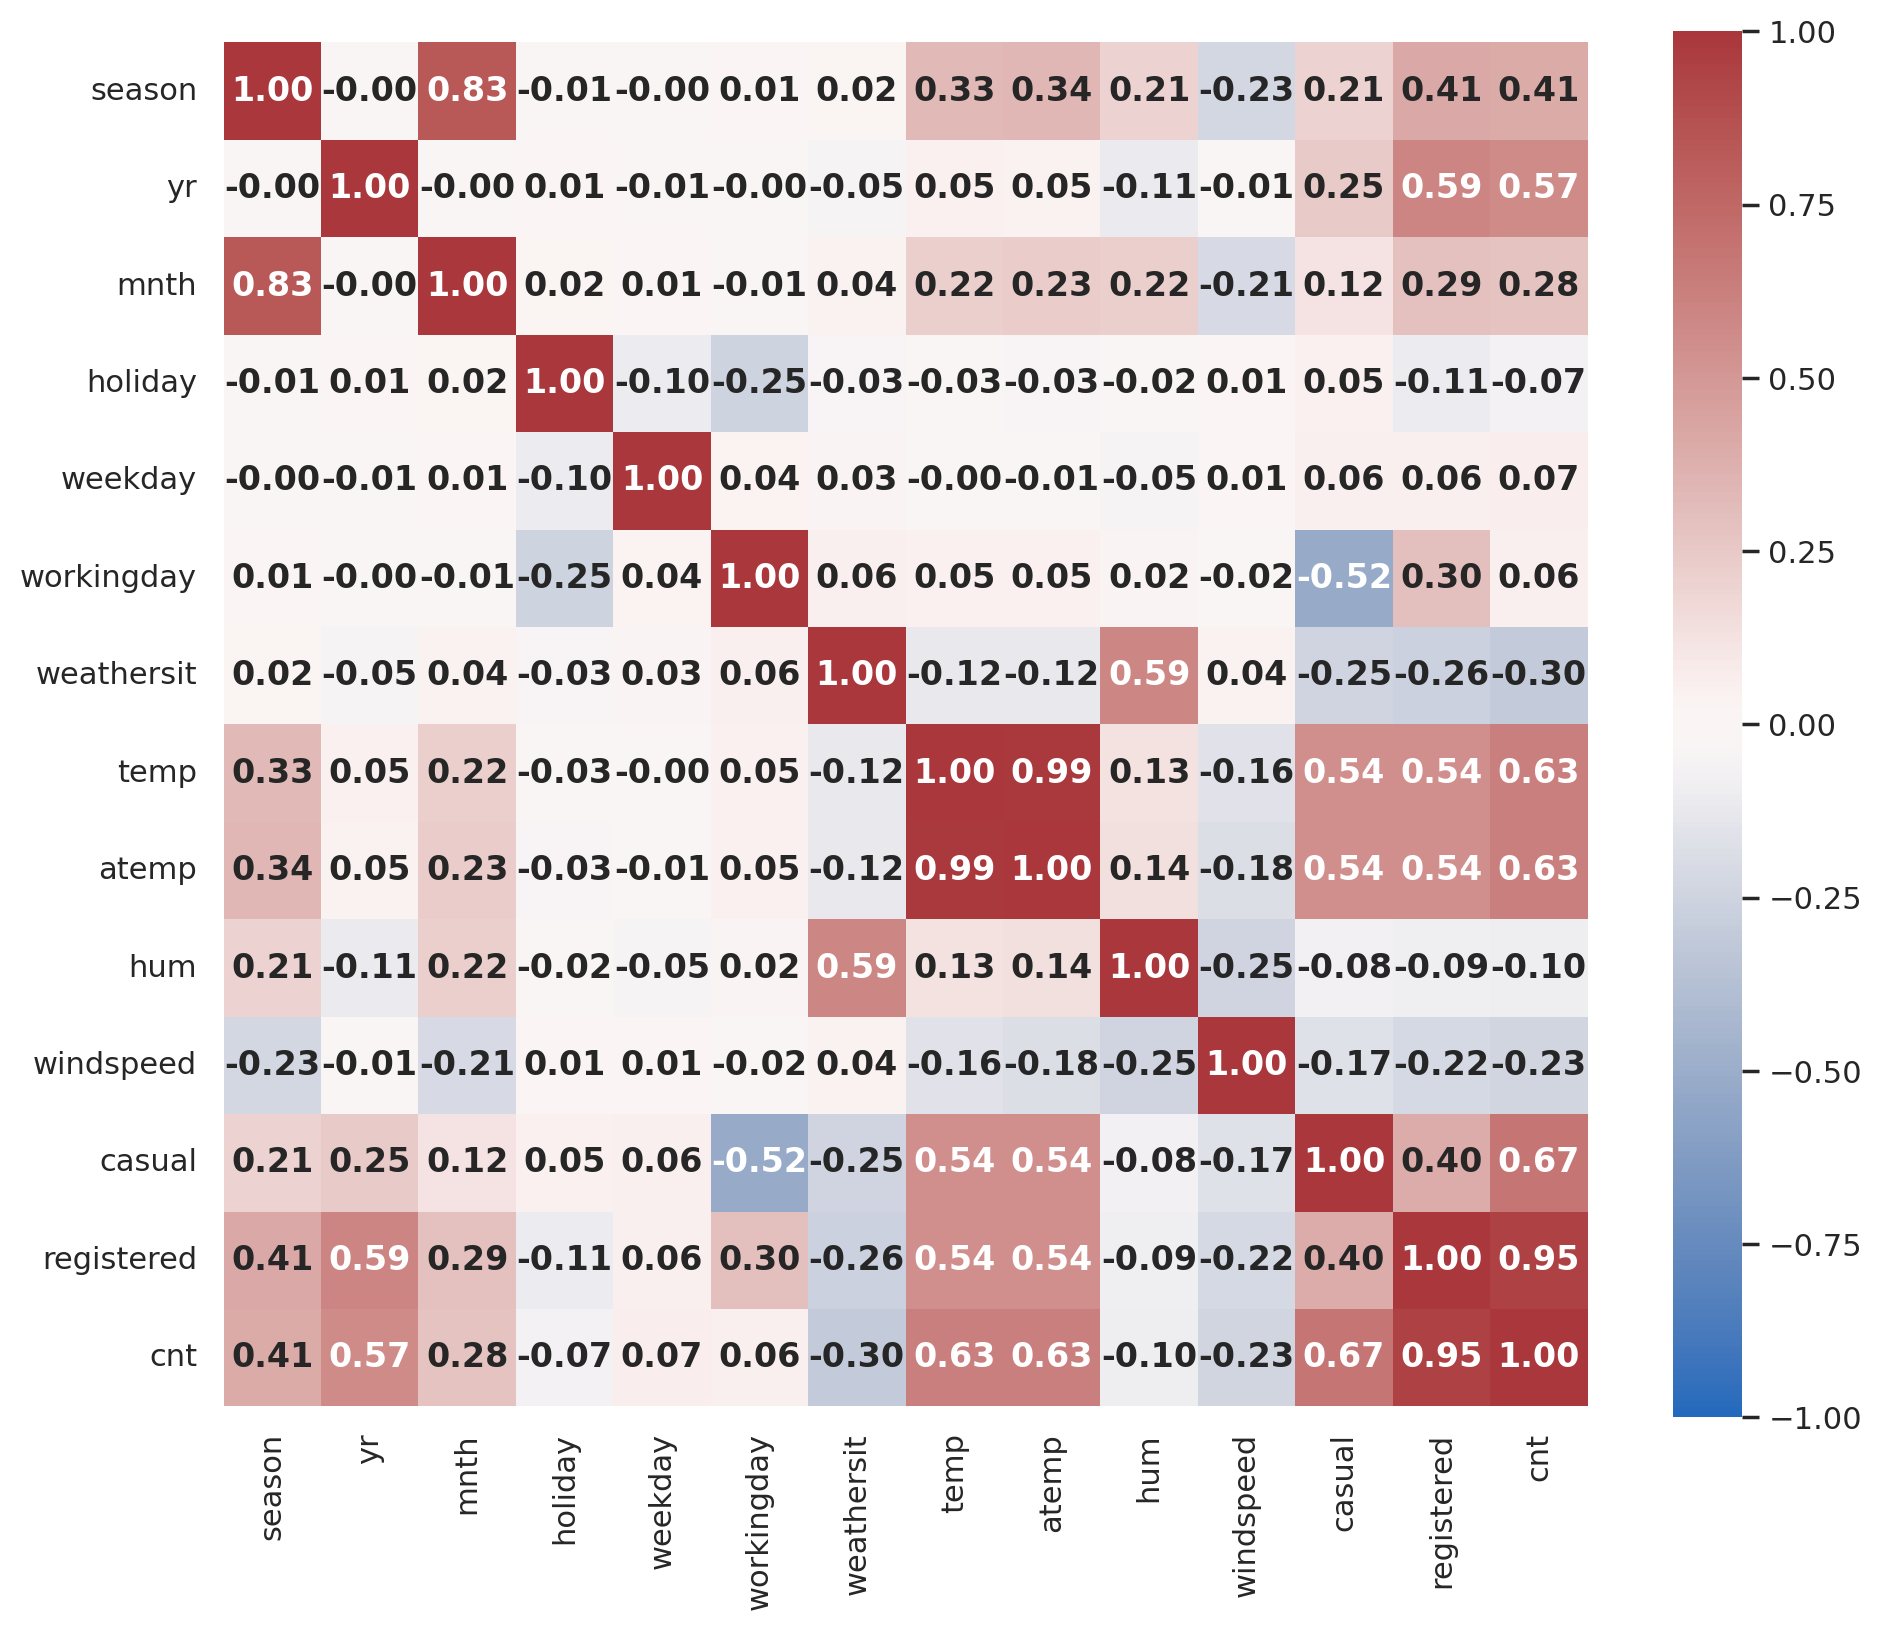

In [146]:
corr = df_day.drop('instant', axis = 1).corr(numeric_only=True)
display(corr)

sns.set_style(style='white')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', center= 0, annot_kws={'fontweight':'bold'}, vmin=-1, vmax=1, square=True);
sns.set(rc={'figure.figsize':(11,9)}) # use `.set()` to expand figure size

The above graphs don't show much for time series data. What would be a better whay to do it? https://www.machinelearningplus.com/time-series/time-series-analysis-python/

# Time Series Analysis

## Boxplot of Month-wise Distribution

<Axes: xlabel='mnth', ylabel='cnt'>

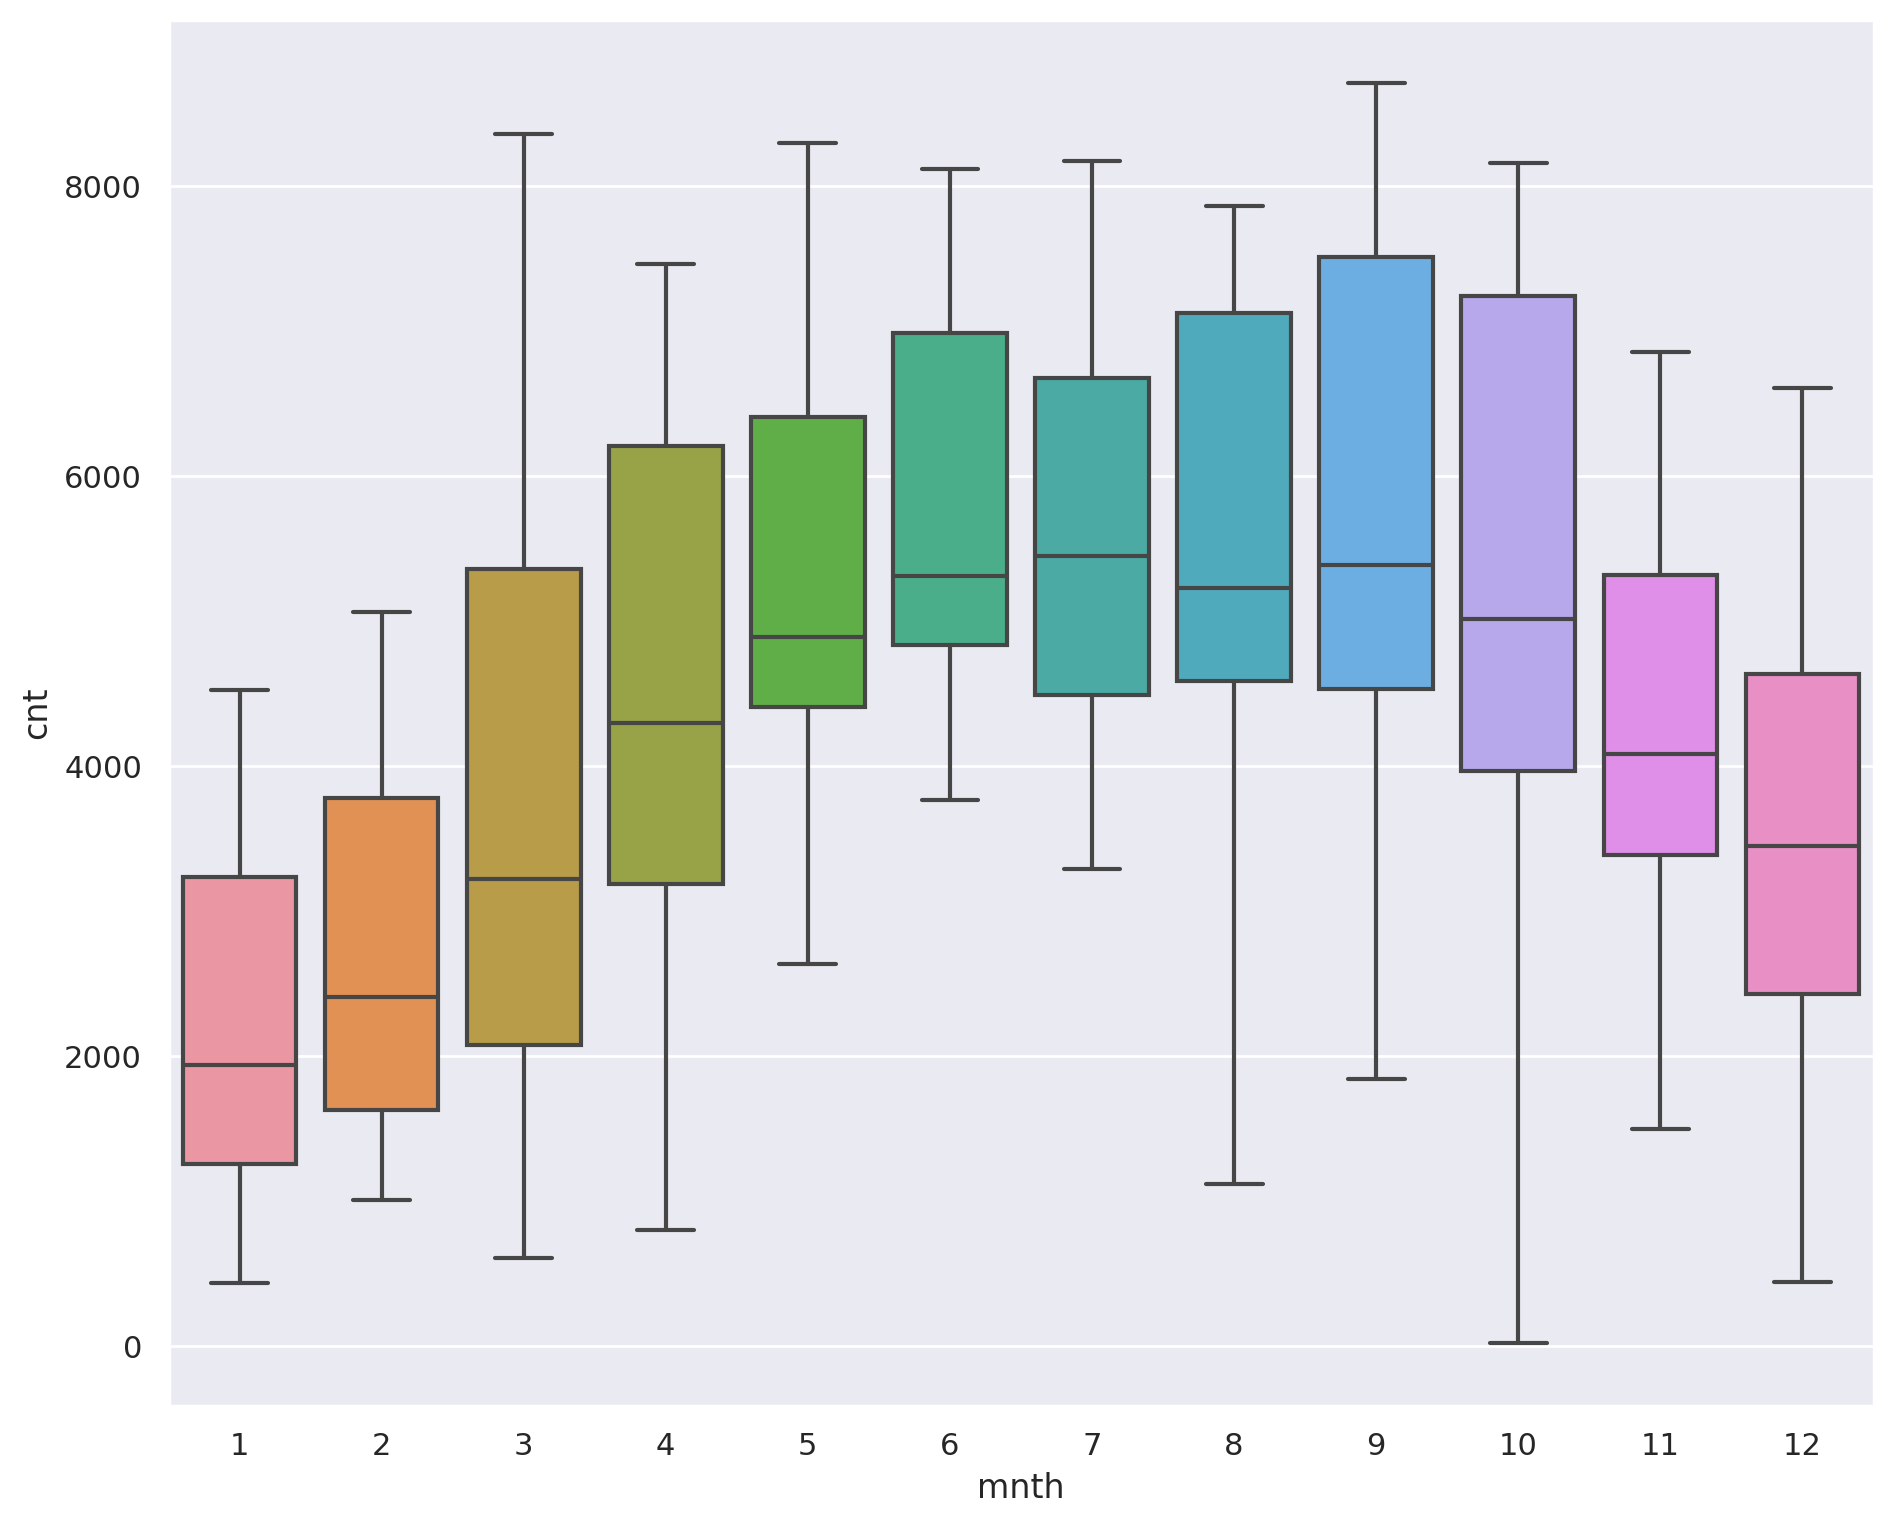

In [147]:
sns.boxplot(data=df_day, x='mnth', y='cnt')

<Axes: xlabel='mnth', ylabel='cnt'>

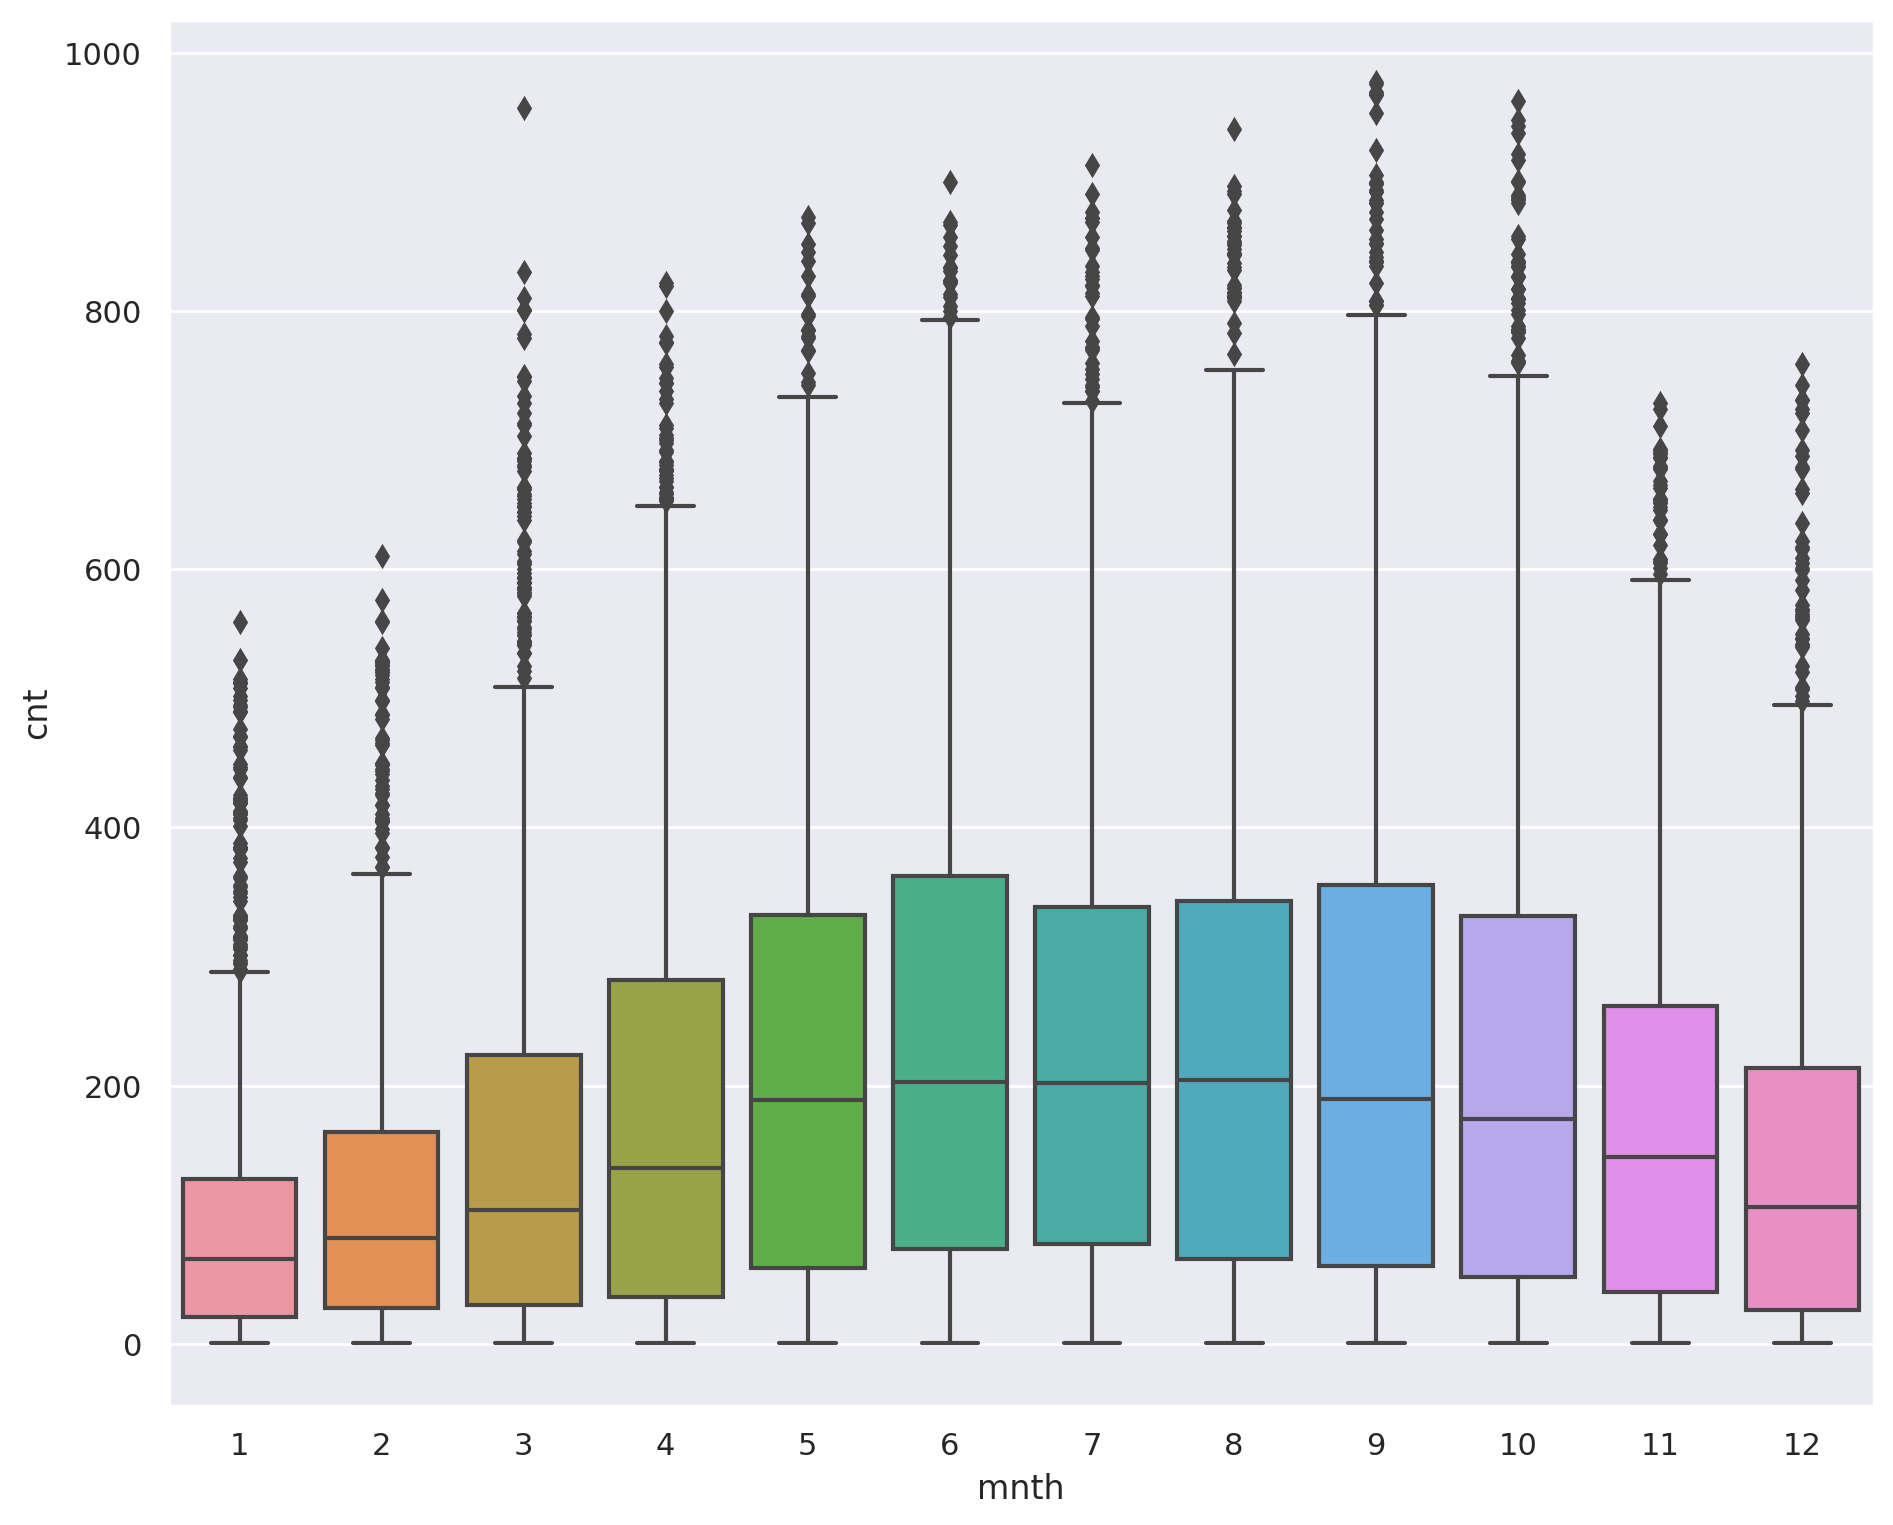

In [148]:
sns.boxplot(data=df_hour, x='mnth', y='cnt')

<Axes: xlabel='weekday', ylabel='cnt'>

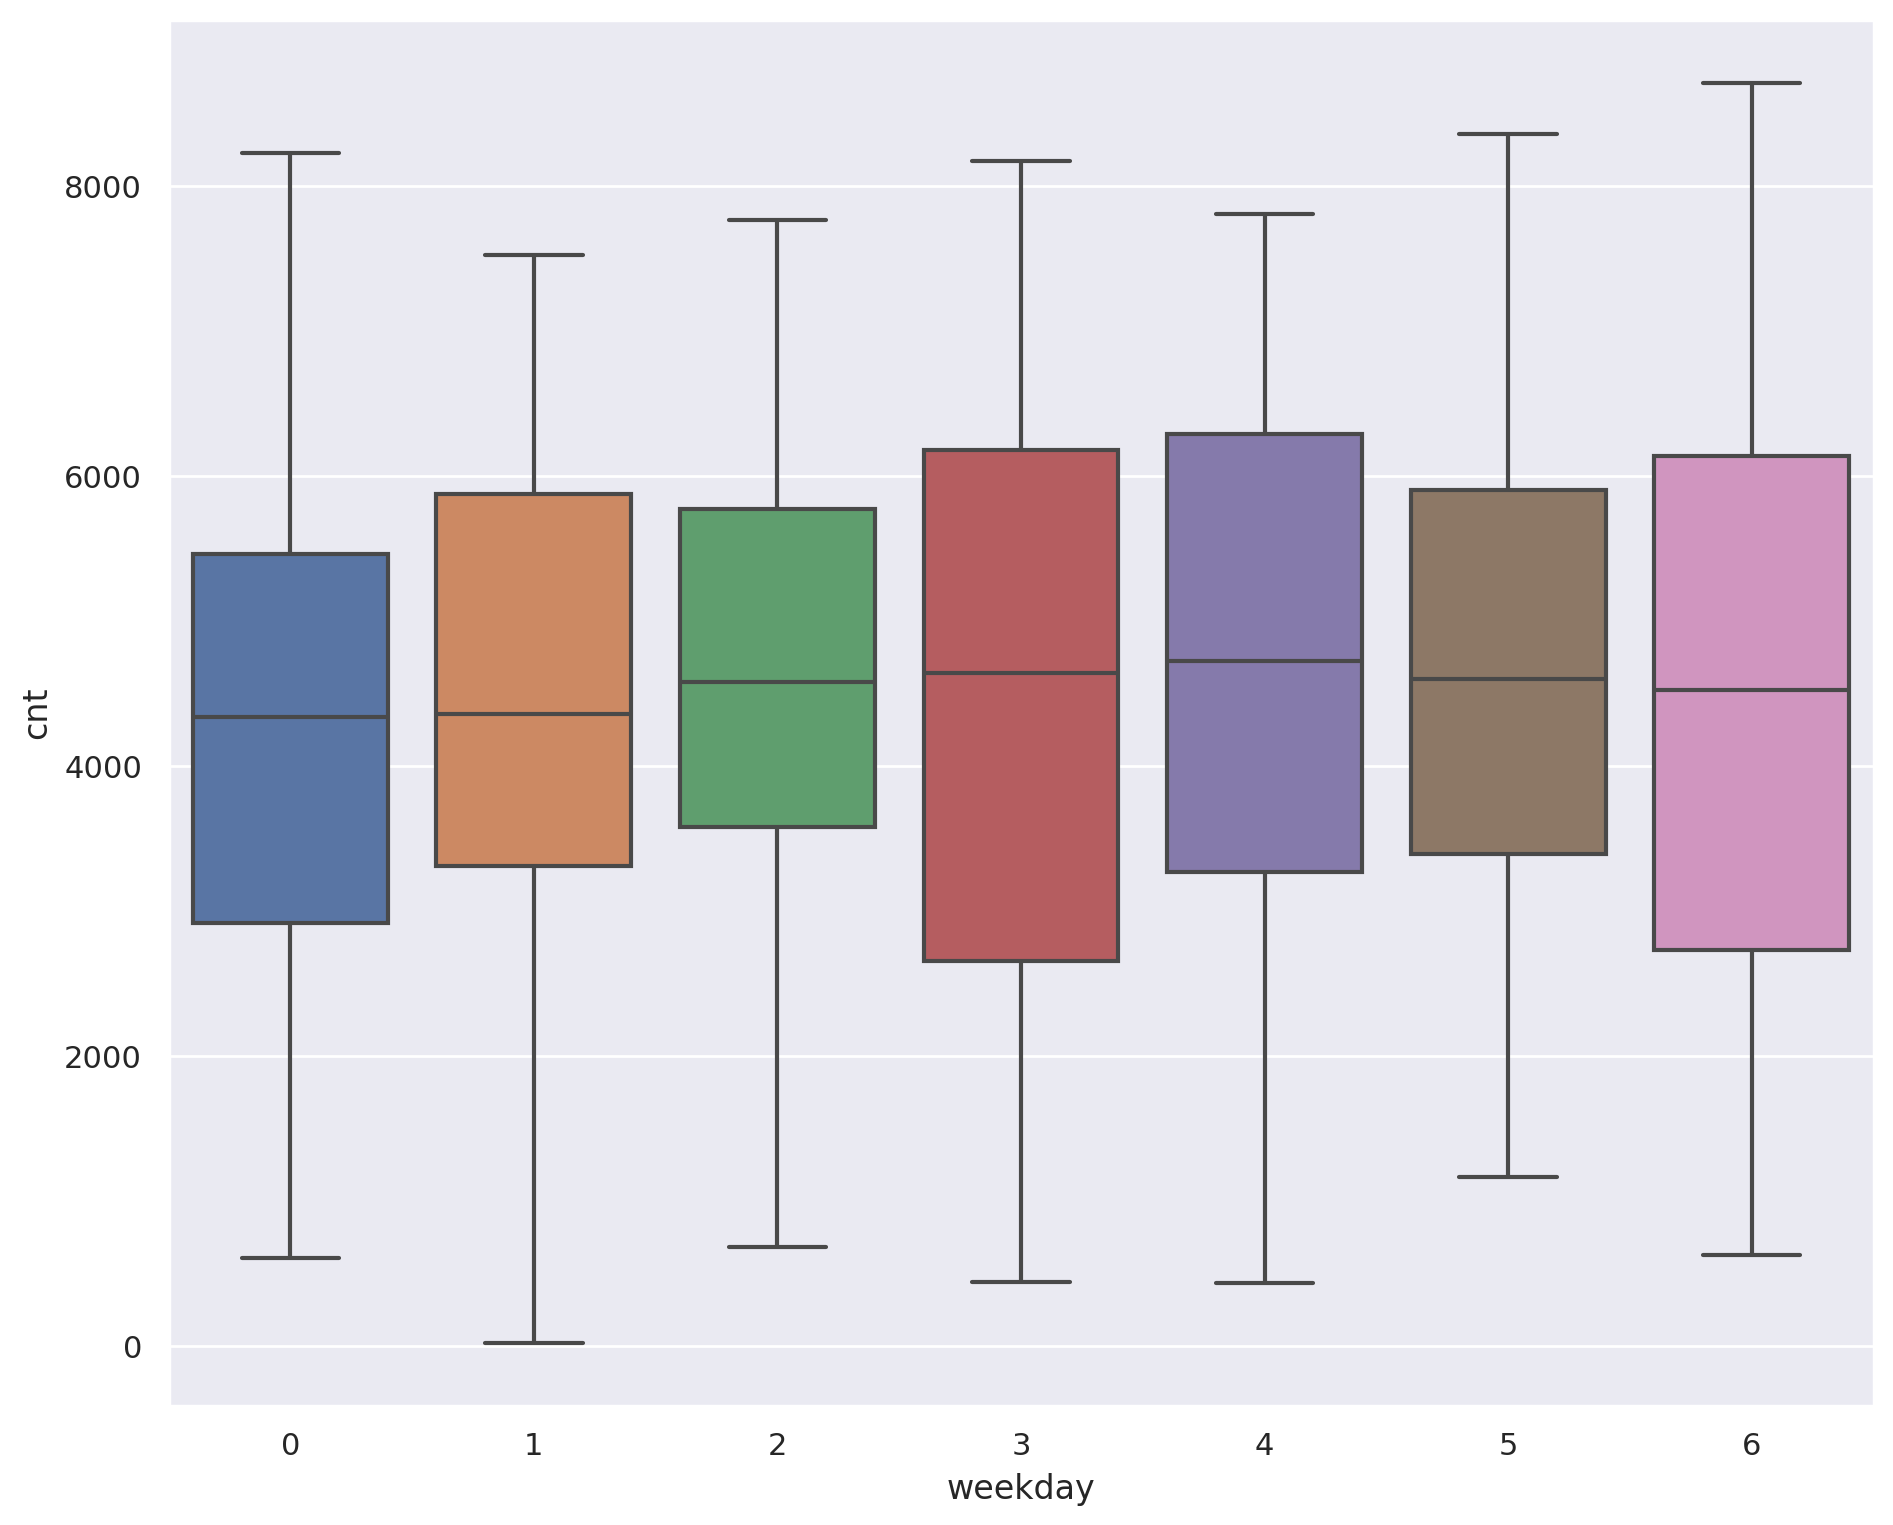

In [149]:
sns.boxplot(data=df_day, x='weekday', y='cnt')

<Axes: xlabel='weekday', ylabel='cnt'>

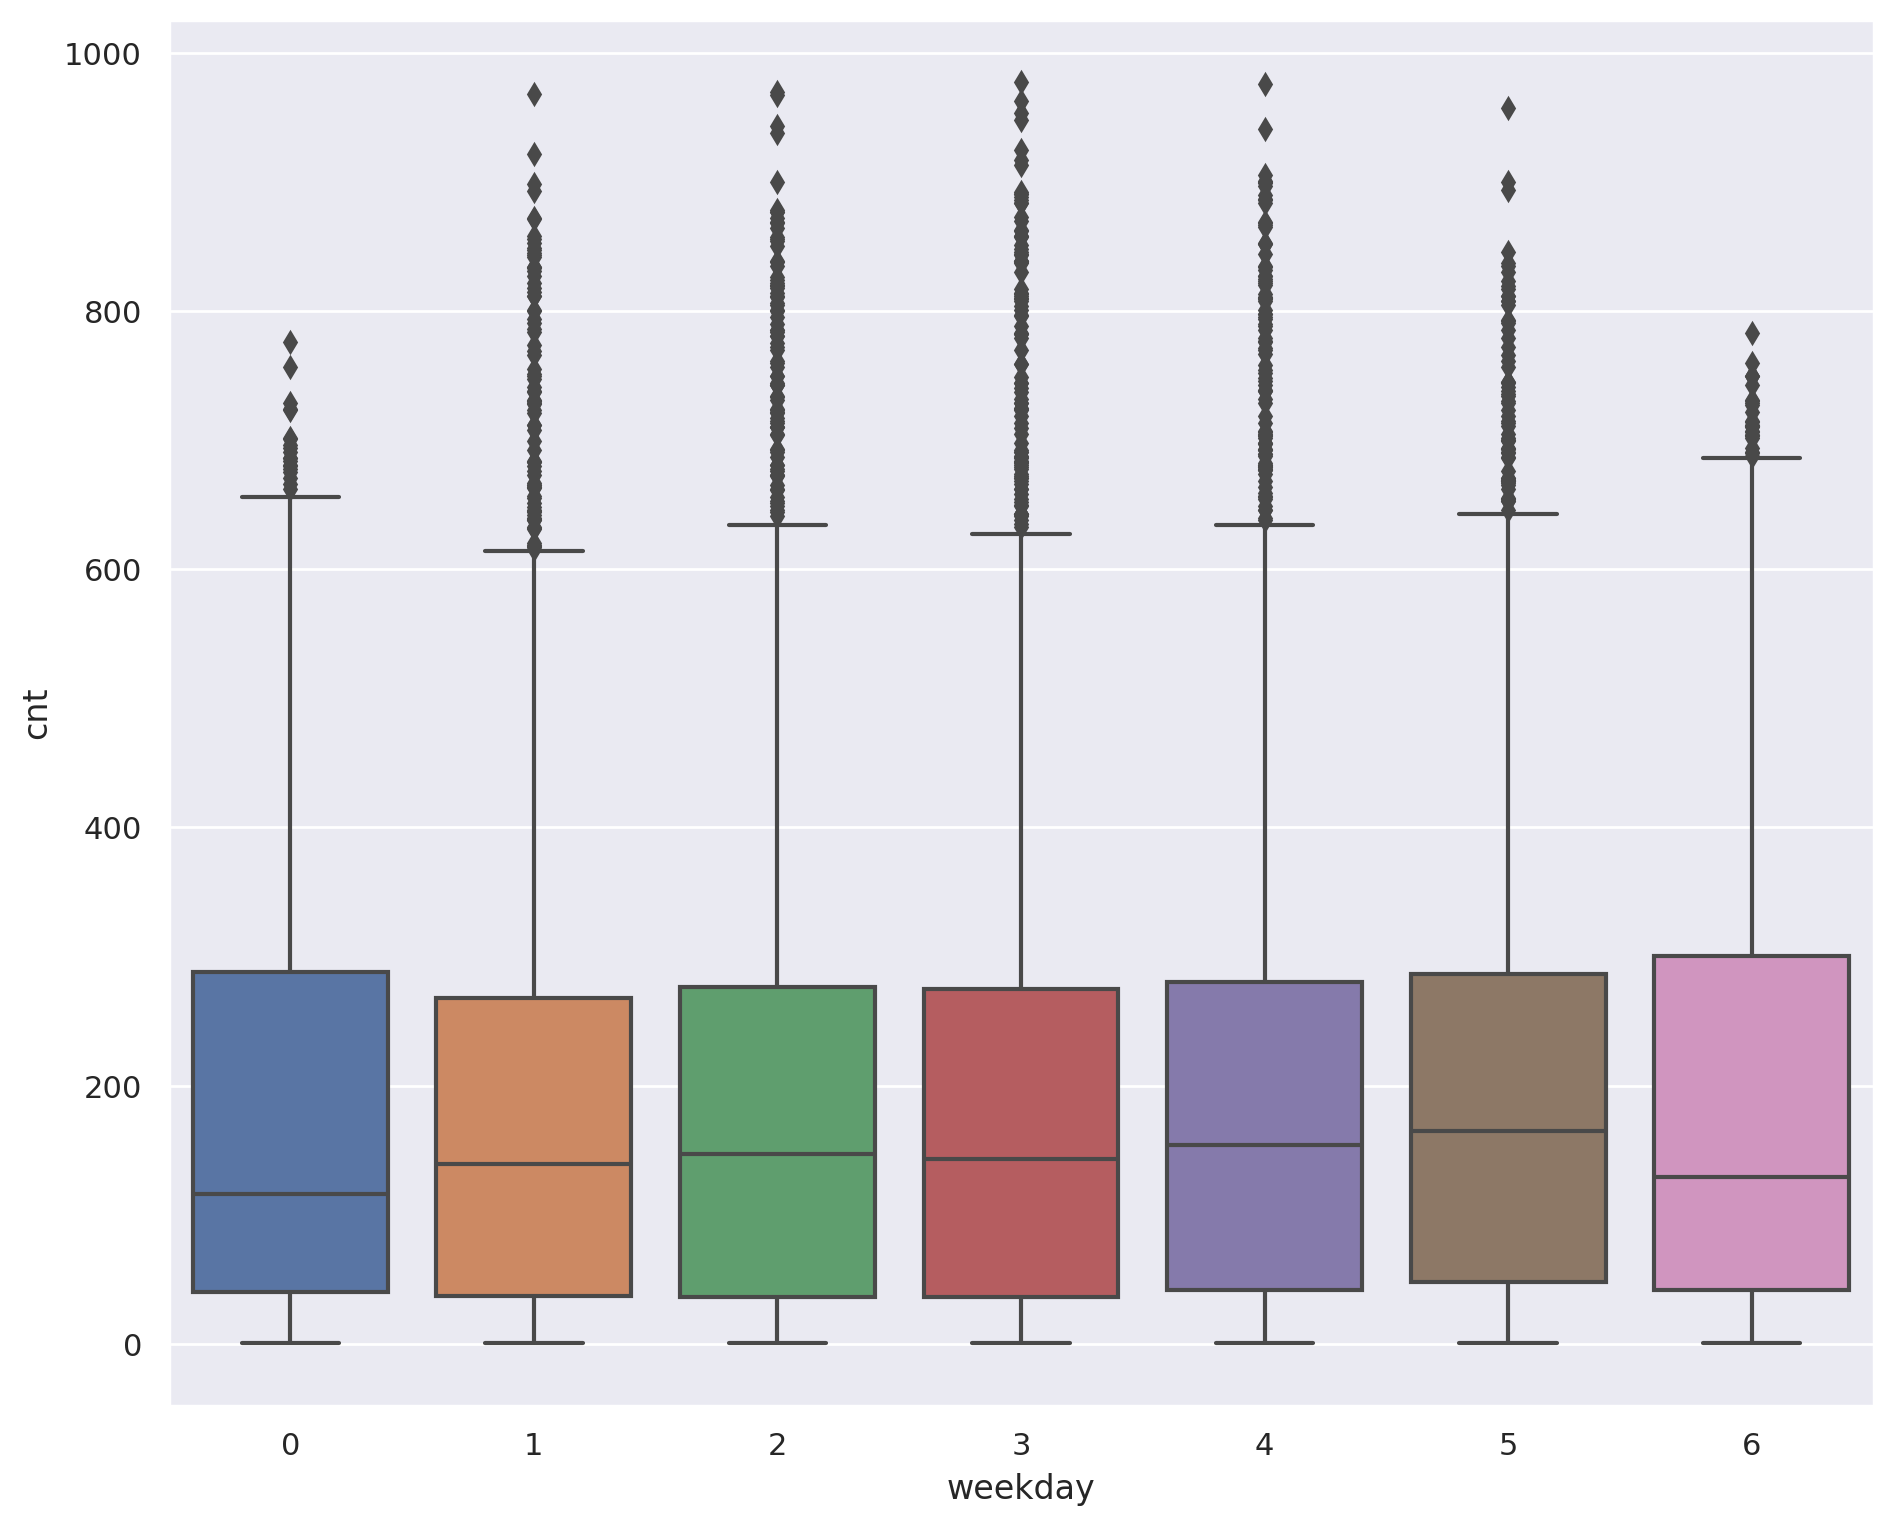

In [150]:
sns.boxplot(data=df_hour, x='weekday', y='cnt')

Inconsistencies in graphing grouped data - sum or mean?

# Time Series line graphs

Text(0, 0.5, 'Rides')

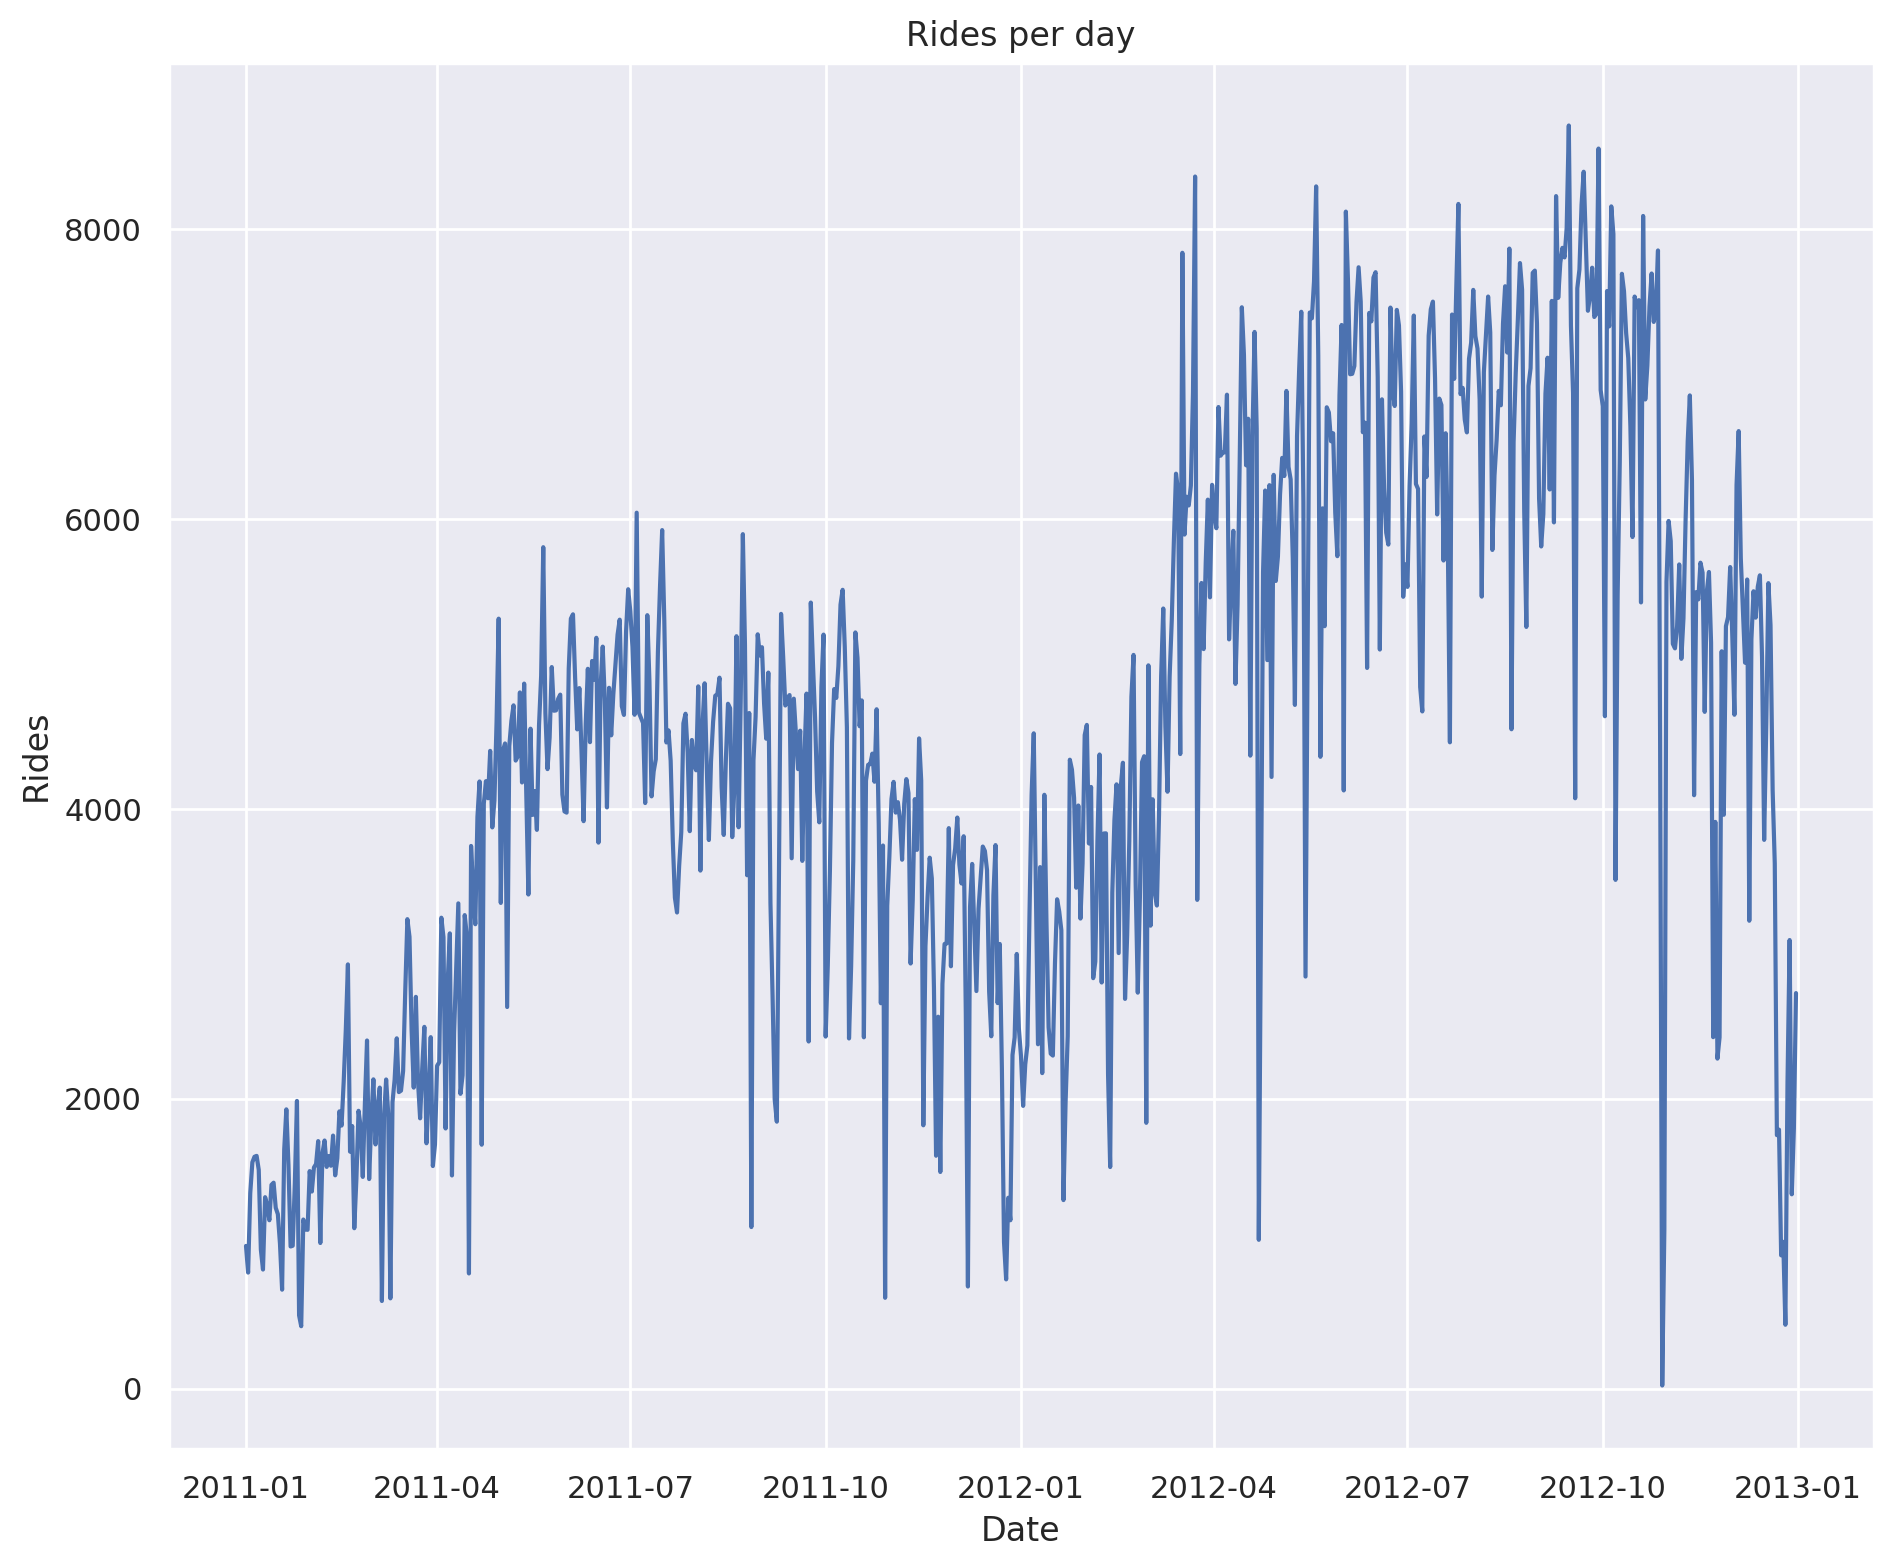

In [164]:
x = df_day['dteday']
y = df_day['cnt']

plt.plot(x, y)

plt.title('Rides per day')
plt.xlabel('Date')
plt.ylabel('Rides')




Linear regression with time series

In [165]:
#TODO

# Time Series: Heatmap (rides per weekday per calendar month)

weekday            0            1            2            3            4  \
mnth                                                                       
1        1815.900000  1926.800000  2567.777778  2138.625000  2513.250000   
2        2247.500000  2604.375000  2824.000000  2813.333333  2878.500000   
3        3301.000000  3545.625000  3574.000000  3670.000000  3817.000000   
4        4416.888889  4515.777778  4555.875000  4330.875000  4764.000000   
5        5320.222222  4512.333333  5025.000000  5119.222222  5892.666667   
6        5940.375000  5478.250000  5680.875000  5701.000000  5621.777778   
7        5298.100000  5791.555556  5844.222222  5814.000000  5623.625000   
8        4703.000000  5518.333333  5930.444444  6076.900000  6038.333333   
9        6159.555556  5637.125000  5184.500000  5668.250000  5485.555556   
10       4734.888889  4632.400000  5064.555556  5504.777778  5537.250000   
11       4126.125000  4658.375000  4040.222222  4136.333333  3994.333333   
12       2739.888889  3497.666667  3713.250000  3270.375000  3710.888889   
All      4228.828571  4338.123810  4510.663462  4548.538462  4667.259615   

weekday            5            6          All  
mnth                                            
1        2446.500000  1956.555556  2176.338710  
2        2933.125000  2266.500000  2655.298246  
3        3925.777778  3938.777778  3692.258065  
4        4387.000000  4445.666667  4484.900000  
5        5751.000000  5978.500000  5349.774194  
6        5616.333333  6343.777778  5772.366667  
7        5405.888889  5232.333333  5563.677419  
8        5958.444444  5223.875000  5664.419355  
9        5747.000000  6393.666667  5766.516667  
10       5623.250000  5445.111111  5199.225806  
11       4523.666667  4288.000000  4247.183333  
12       3742.444444  3194.900000  3403.806452  
All      4690.288462  4550.542857  4504.348837

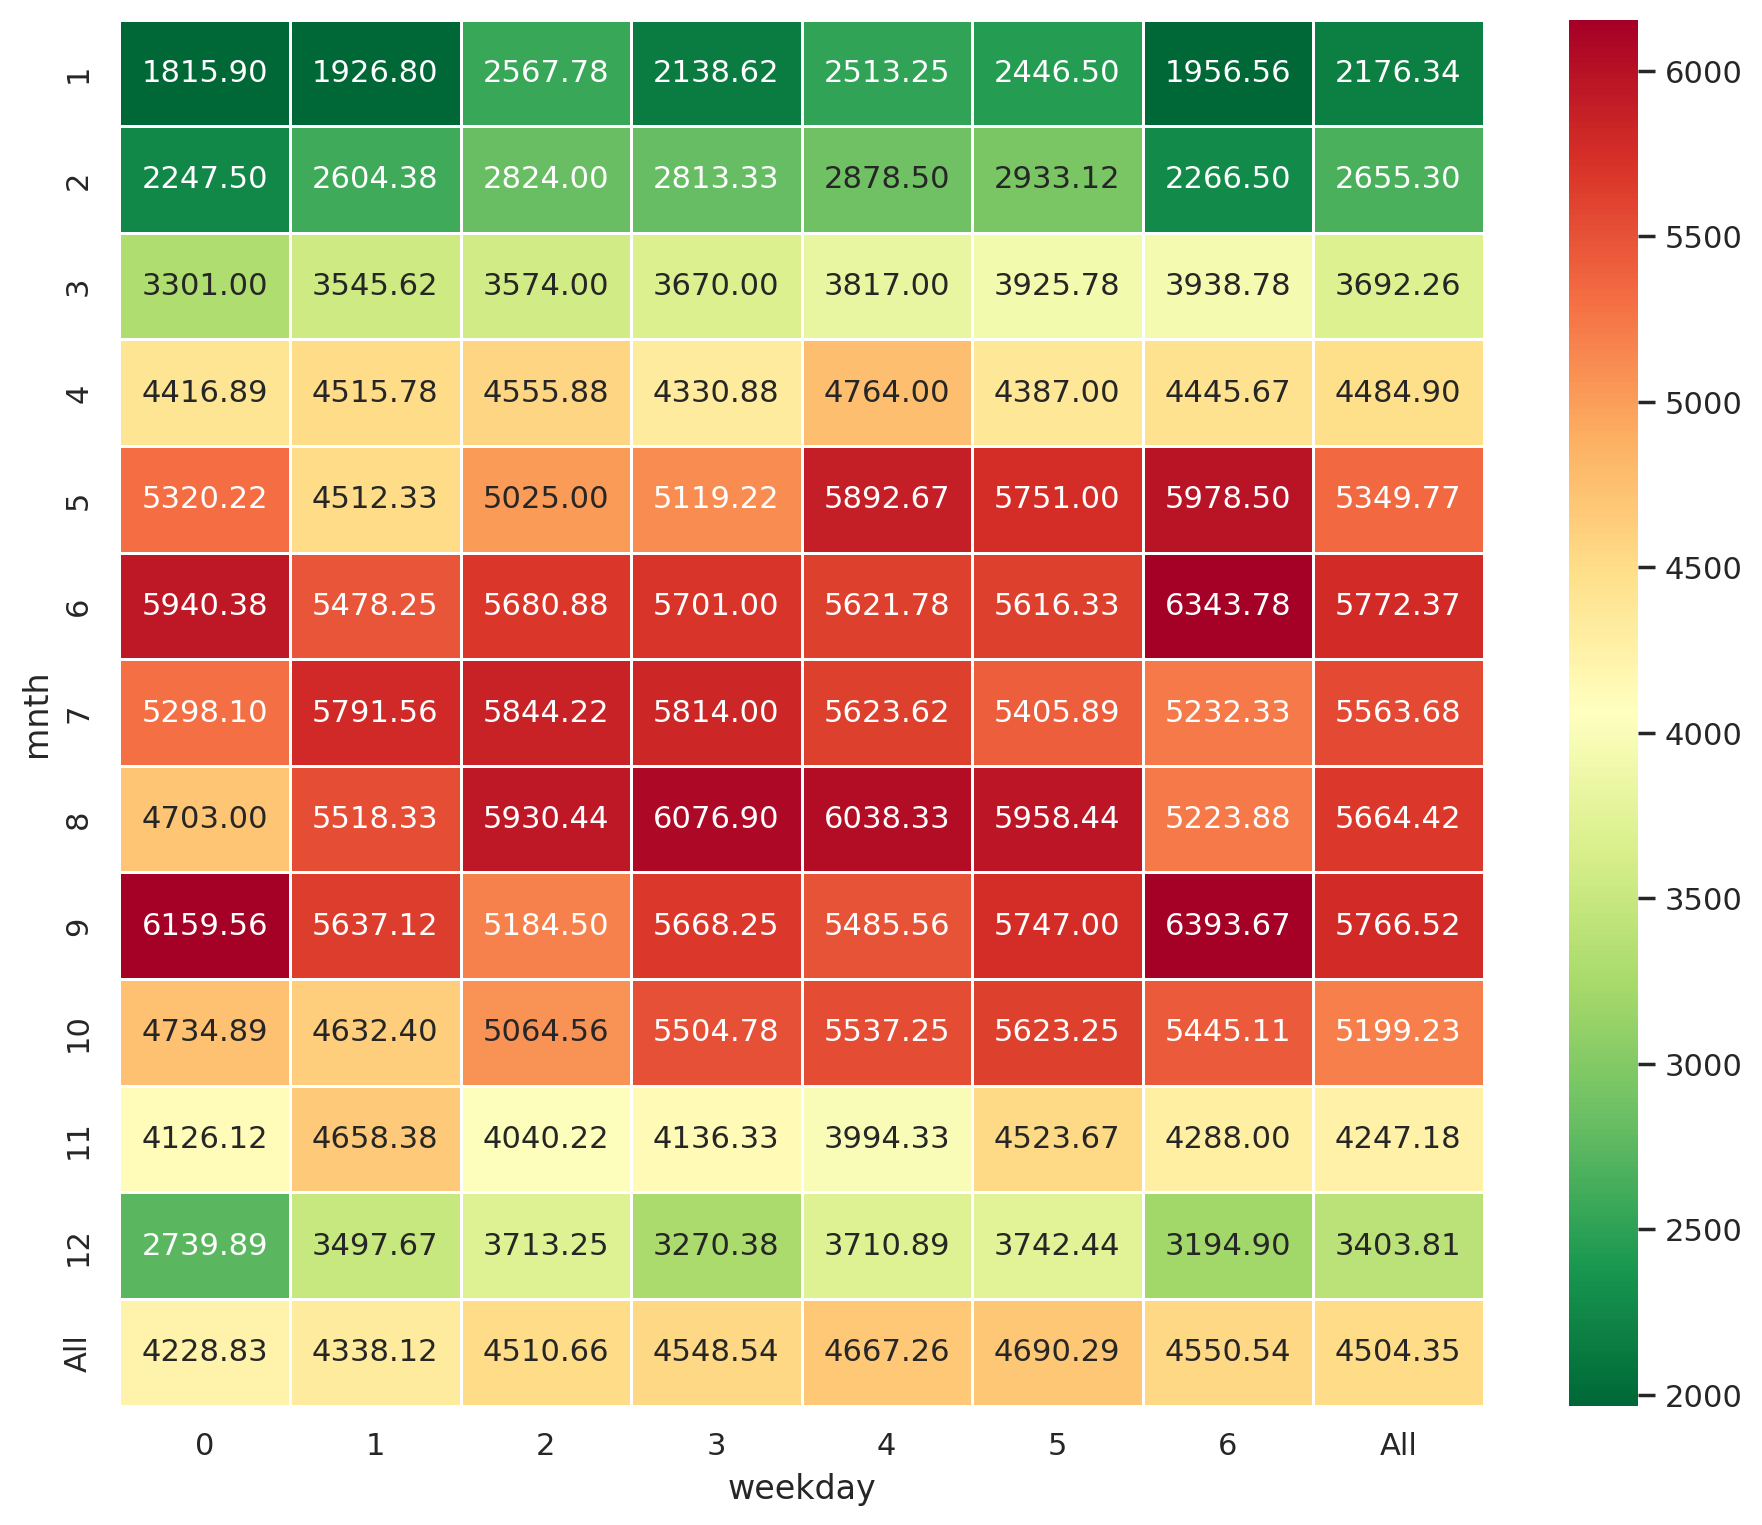

In [151]:
df_day_month = pd.pivot_table(df_day, values="cnt",
                                   index=["mnth"],
                                   columns=["weekday"],
                                   fill_value=0,
                                   margins=True)
display(df_day_month)

#df_day_month.drop(column='All', axis=1)

ax=sns.heatmap(df_day_month, cmap='RdYlGn_r',
                 robust=True,
                 fmt='.2f',
                 annot=True,
                 linewidths=.5,
                 annot_kws={'size':11})